# Proyek Analisis Data: E-Commerce Dataset
- Nama: William Devin Septianus Pranggono
- Email: wdevinsp@gmail.com
- Id Dicoding: wdevinsp

##Menentukan Pertanyaan Bisnis


Pada dataset e-commerce, akan dilakukan proses analisis data untuk mengetahui performa e-commerce tersebut berdasarkan jumlah order, review, dan revenue. Harapan dari analisis ini adalah dapat memproyeksikan performa e-commerce, serta sektor produk yang menghasilkan revenue dan order terbesar.

Oleh karena itu, beberapa pertanyaan yang perlu dijawab adalah :

- Bagaimana penjualan produk selama beberapa bulan di e-commerce tersebut?
- Apa kategori produk dengan jumlah pemesanan dan penjualan produk terbanyak?
- Kategori produk apa yang memiliki review paling bagus dan paling buruk?
- Kapan terakhir kali pembelian dilakukan oleh pelanggan?
- Berapa kali pelanggan melakukan pemesanan dalam beberapa bulan terakhir?
- Berapa banyak uang yang pelanggan keluarkan untuk membeli barang?

## Menyiapkan semua library yang dibutuhkan

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import datetime

##Data Wrangling

###Gathering Data

In [ ]:
df_customer = pd.read_csv("https://raw.githubusercontent.com/WilliamDevin23/Practice-EDA-Dicoding/e760eed35d49447fd22c7c4fc7fc175b1df3a495/customers_dataset.csv")
df_payment = pd.read_csv("https://raw.githubusercontent.com/WilliamDevin23/Practice-EDA-Dicoding/E-Commerce_EDA/order_payments_dataset.csv")
df_translate = pd.read_csv("https://raw.githubusercontent.com/WilliamDevin23/Practice-EDA-Dicoding/e760eed35d49447fd22c7c4fc7fc175b1df3a495/product_category_name_translation.csv")
df_geo = pd.read_csv("https://raw.githubusercontent.com/WilliamDevin23/Practice-EDA-Dicoding/e760eed35d49447fd22c7c4fc7fc175b1df3a495/geolocation_dataset.csv")
df_seller = pd.read_csv("https://raw.githubusercontent.com/WilliamDevin23/Practice-EDA-Dicoding/e760eed35d49447fd22c7c4fc7fc175b1df3a495/sellers_dataset.csv")
df_review = pd.read_csv("https://raw.githubusercontent.com/WilliamDevin23/Practice-EDA-Dicoding/E-Commerce_EDA/order_reviews_dataset.csv")
df_product = pd.read_csv("https://raw.githubusercontent.com/WilliamDevin23/Practice-EDA-Dicoding/E-Commerce_EDA/products_dataset.csv")
df_order = pd.read_csv("https://raw.githubusercontent.com/WilliamDevin23/Practice-EDA-Dicoding/e760eed35d49447fd22c7c4fc7fc175b1df3a495/order_items_dataset.csv")
df_ship = pd.read_csv("https://raw.githubusercontent.com/WilliamDevin23/Practice-EDA-Dicoding/E-Commerce_EDA/orders_dataset.csv")

###Assessing Data

In [ ]:
df_dict = {"Customer":df_customer,
           "Seller":df_seller,
           "Product":df_product,
           "Order":df_order,
           "Review":df_review,
           "Shipping":df_ship,
           "Geolocation":df_geo,
           "Payment":df_payment,
           "Translate":df_translate}

####A. Mengetahui fitur pada dataset :

#####Head dari tabel

In [ ]:
for name, table in df_dict.items():
  print("{} head :\n{}\n".format(name, table.head()))

Customer head :
                        customer_id                customer_unique_id  \
0  06b8999e2fba1a1fbc88172c00ba8bc7  861eff4711a542e4b93843c6dd7febb0   
1  18955e83d337fd6b2def6b18a428ac77  290c77bc529b7ac935b93aa66c333dc3   
2  4e7b3e00288586ebd08712fdd0374a03  060e732b5b29e8181a18229c7b0b2b5e   
3  b2b6027bc5c5109e529d4dc6358b12c3  259dac757896d24d7702b9acbbff3f3c   
4  4f2d8ab171c80ec8364f7c12e35b23ad  345ecd01c38d18a9036ed96c73b8d066   

   customer_zip_code_prefix          customer_city customer_state  
0                     14409                 franca             SP  
1                      9790  sao bernardo do campo             SP  
2                      1151              sao paulo             SP  
3                      8775        mogi das cruzes             SP  
4                     13056               campinas             SP  

Seller head :
                          seller_id  seller_zip_code_prefix  \
0  3442f8959a84dea7ee197c632cb2df15                   13023

Fitur yang banyak pada setiap tabel harus diseleksi agar relevan dengan tujuan analisis. Selain itu, akan dilakukan translation ke bahasa inggris untuk kategori produk.

Tabel geolocation terlihat tidak perlu digunakan. Tabel geolocation hanya berisi detail latitude dan longitude lokasi.

#####Apa perbedaan customer_id dan customer_unique_id?

In [ ]:
print(df_customer["customer_unique_id"].nunique())
print(df_customer["customer_id"].nunique())

96096
99441


Berdasarkan kode di atas, dapat dilihat bahwa customer_id selalu berbeda-beda. Jumlahnya sama dengan total jumlah data keseluruhan. Sedangkan, jumlah customer_unique_id lebih sedikit daripada jumlah total data.
Maka, customer_unique_id merupakan identifier yang unik untuk setiap customer.

#####Apa itu order_item_id ?

In [ ]:
df_order.describe()

,order_item_id,price,freight_value
count,112650.000000,112650.000000,112650.000000
mean,1.197834,120.653739,19.990320
std,0.705124,183.633928,15.806405
min,1.000000,0.850000,0.000000
25%,1.000000,39.900000,13.080000
50%,1.000000,74.990000,16.260000
75%,1.000000,134.900000,21.150000
max,21.000000,6735.000000,409.680000


Nilai max. order_item_id = 21. Jika dicek, rincian order_id dari order_item_id tersebut adalah sebagai berikut.

In [ ]:
df_order[df_order["order_item_id"] == 21]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
57317,8272b63d03f5f79c56e9e4120aec44ef,21,79ce45dbc2ea29b22b5a261bbb7b7ee7,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,7.8,6.57


In [ ]:
df_order[df_order["order_id"] == "8272b63d03f5f79c56e9e4120aec44ef"]

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
57297,8272b63d03f5f79c56e9e4120aec44ef,1,270516a3f41dc035aa87d220228f844c,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57298,8272b63d03f5f79c56e9e4120aec44ef,2,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57299,8272b63d03f5f79c56e9e4120aec44ef,3,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57300,8272b63d03f5f79c56e9e4120aec44ef,4,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57301,8272b63d03f5f79c56e9e4120aec44ef,5,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57302,8272b63d03f5f79c56e9e4120aec44ef,6,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57303,8272b63d03f5f79c56e9e4120aec44ef,7,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57304,8272b63d03f5f79c56e9e4120aec44ef,8,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57305,8272b63d03f5f79c56e9e4120aec44ef,9,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89
57306,8272b63d03f5f79c56e9e4120aec44ef,10,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.2,7.89


Order_item_id adalah ID item yang dipesan dalam satu order_id. Order item ID akan bertambah hingga jumlah pesanan yang dipesan oleh suatu order_id. Hanya saja, dapat dilihat di tabel diatas, order item ID dicampur untuk semua jenis produk. Oleh karena itu, ketika penggabungan seluruh tabel, akan dilakukan agregasi pada tabel berdasarkan order_id dan product_id.

#####Hubungan order dan payment

In [ ]:
df_payment[df_payment["order_id"] == "8272b63d03f5f79c56e9e4120aec44ef"]

,order_id,payment_sequential,payment_type,payment_installments,payment_value
71010,8272b63d03f5f79c56e9e4120aec44ef,1,credit_card,2,196.11


Payment_value adalah total pembayaran pelanggan pada semua produk yang mereka pesan dan freight value yang ada di tabel order.

In [ ]:
print(df_payment["order_id"].nunique())
print(df_payment.shape[0])

99440
103886


Selain itu, dapat dilihat bahwa 1 order_id dapat muncul lebih dari 1 kali pada tabel payment.

#####Hubungan antara review_id dengan id yang lain

In [ ]:
rel = pd.merge(left=df_review, right=df_customer, how="left",left_on="review_id",right_on="customer_id")
rel.isna().sum()

review_id                       0
order_id                        0
review_score                    0
review_comment_title        87656
review_comment_message      58247
review_creation_date            0
review_answer_timestamp         0
customer_id                 99224
customer_unique_id          99224
customer_zip_code_prefix    99224
customer_city               99224
customer_state              99224
dtype: int64

In [ ]:
rel = pd.merge(left=df_review, right=df_customer, how="left",left_on="review_id",right_on="customer_unique_id")
rel.isna().sum()

review_id                       0
order_id                        0
review_score                    0
review_comment_title        87656
review_comment_message      58247
review_creation_date            0
review_answer_timestamp         0
customer_id                 99224
customer_unique_id          99224
customer_zip_code_prefix    99224
customer_city               99224
customer_state              99224
dtype: int64

In [ ]:
rel = pd.merge(left=df_review, right=df_product, how="left",left_on="review_id",right_on="product_id")
rel.isna().sum()

review_id                         0
order_id                          0
review_score                      0
review_comment_title          87656
review_comment_message        58247
review_creation_date              0
review_answer_timestamp           0
product_id                    99224
product_category_name         99224
product_name_lenght           99224
product_description_lenght    99224
product_photos_qty            99224
product_weight_g              99224
product_length_cm             99224
product_height_cm             99224
product_width_cm              99224
dtype: int64

In [ ]:
rel = pd.merge(left=df_review, right=df_seller, how="left",left_on="review_id",right_on="seller_id")
rel.isna().sum()

review_id                      0
order_id                       0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
seller_id                  99224
seller_zip_code_prefix     99224
seller_city                99224
seller_state               99224
dtype: int64

In [ ]:
rel = pd.merge(left=df_review, right=df_order, how="left",left_on="review_id",right_on="order_id")
rel.isna().sum()

review_id                      0
order_id_x                     0
review_score                   0
review_comment_title       87656
review_comment_message     58247
review_creation_date           0
review_answer_timestamp        0
order_id_y                 99224
order_item_id              99224
product_id                 99224
seller_id                  99224
shipping_limit_date        99224
price                      99224
freight_value              99224
dtype: int64

Berdasarkan data-data diatas, dapat disimpulkan bahwa review_id tidak ada relevansi dengan id dari tabel-tabel lain. ID yang disimpan di tabel review dan dapat dihubungkan hanya order_id. Oleh karena itu, pertanyaan mengenai review tiap kategori produk mungkin tidak dapat dijawab secara tepat.

Untuk langkah-langkah berikutnya, diasumsikan review yang diberikan di setiap order dapat merepresentasikan review setiap kategori produk.

In [ ]:
df_dict = {"Customer":df_customer,
           "Seller":df_seller,
           "Product":df_product,
           "Order":df_order,
           "Review":df_review,
           "Shipping":df_ship,
           "Payment":df_payment,
           "Translate":df_translate}

####B. Mengetahui info dataset :

In [ ]:
for name, table in df_dict.items() :
  print("{} info : \n".format(name))
  print(table.info(), "\n")

Customer info : 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99441 entries, 0 to 99440
Data columns (total 5 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   customer_id               99441 non-null  object
 1   customer_unique_id        99441 non-null  object
 2   customer_zip_code_prefix  99441 non-null  int64 
 3   customer_city             99441 non-null  object
 4   customer_state            99441 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.8+ MB
None 

Seller info : 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3095 entries, 0 to 3094
Data columns (total 4 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   seller_id               3095 non-null   object
 1   seller_zip_code_prefix  3095 non-null   int64 
 2   seller_city             3095 non-null   object
 3   seller_state            3095 non-null   object
dtype

Berdasarkan info diatas, akan dilakukan perubahan format tanggal order untuk mempermudah analisis.

####C. Mengetahui ringkasan statistikal dari data :

In [ ]:
for name, table in df_dict.items():
  if "int64" in table.dtypes.to_list():
    print("{} describe :\n{}\n".format(name, table.describe()))

Customer describe :
       customer_zip_code_prefix
count              99441.000000
mean               35137.474583
std                29797.938996
min                 1003.000000
25%                11347.000000
50%                24416.000000
75%                58900.000000
max                99990.000000

Seller describe :
       seller_zip_code_prefix
count             3095.000000
mean             32291.059451
std              32713.453830
min               1001.000000
25%               7093.500000
50%              14940.000000
75%              64552.500000
max              99730.000000

Order describe :
       order_item_id          price  freight_value
count  112650.000000  112650.000000  112650.000000
mean        1.197834     120.653739      19.990320
std         0.705124     183.633928      15.806405
min         1.000000       0.850000       0.000000
25%         1.000000      39.900000      13.080000
50%         1.000000      74.990000      16.260000
75%         1.000000     134

Berdasarkan data diatas, tidak ditemukan adanya anomali.

Nilai nol pada minimum payment value mungkin dikarenakan adanya promo belanja gratis, dan nilai nol pada minimum freight value juga dapat dikarenakan adanya promo bebas biaya pengiriman.

####D. Mengecek missing value(s) pada data :

In [ ]:
for name, table in df_dict.items():
  print("Missing value(s) in {0} table: \n{1}\n".format(name, table.isna().sum()))

Missing value(s) in Customer table: 
customer_id                 0
customer_unique_id          0
customer_zip_code_prefix    0
customer_city               0
customer_state              0
dtype: int64

Missing value(s) in Seller table: 
seller_id                 0
seller_zip_code_prefix    0
seller_city               0
seller_state              0
dtype: int64

Missing value(s) in Product table: 
product_id                      0
product_category_name         610
product_name_lenght           610
product_description_lenght    610
product_photos_qty            610
product_weight_g                2
product_length_cm               2
product_height_cm               2
product_width_cm                2
dtype: int64

Missing value(s) in Order table: 
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

Missing value(s) in Review table: 
review_id               

Berdasarkan data diatas, terdapat banyak missing value pada tabel product, review dan shipping.

Pada tabel product, banyak kategori produk yang kosong.

Pada tabel review, terdapat missing value pada review_comment_title dan review_comment_message. Hal itu dikarenakan pelanggan hanya memberikan review star tanpa memberikan pesan/ulasan pada review mereka.

Sedangkan pada tabel shipping, missing value banyak terdapat pada order_delivered_customer_date. Missing value tersebut mungkin dikarenakan order status yang belum delivered/terkirim.

####E. Mengetahui duplicated data :

In [ ]:
for name, table in df_dict.items():
  print("{} duplicated data : {}\n".format(name, table.duplicated().sum()))

Customer duplicated data : 0

Seller duplicated data : 0

Product duplicated data : 0

Order duplicated data : 0

Review duplicated data : 0

Shipping duplicated data : 0

Payment duplicated data : 0

Translate duplicated data : 0



Berdasarkan uraian diatas, tidak ditemukan adanya data duplikat pada setiap tabel.

###Cleaning Data

####1. Memilih fitur pada setiap tabel

#####Df_customer

In [ ]:
df_customer = df_customer[["customer_id","customer_unique_id","customer_city","customer_state"]].copy()
df_customer.head()

,customer_id,customer_unique_id,customer_city,customer_state
0,06b8999e2fba1a1fbc88172c00ba8bc7,861eff4711a542e4b93843c6dd7febb0,franca,SP
1,18955e83d337fd6b2def6b18a428ac77,290c77bc529b7ac935b93aa66c333dc3,sao bernardo do campo,SP
2,4e7b3e00288586ebd08712fdd0374a03,060e732b5b29e8181a18229c7b0b2b5e,sao paulo,SP
3,b2b6027bc5c5109e529d4dc6358b12c3,259dac757896d24d7702b9acbbff3f3c,mogi das cruzes,SP
4,4f2d8ab171c80ec8364f7c12e35b23ad,345ecd01c38d18a9036ed96c73b8d066,campinas,SP


#####Df_seller

In [ ]:
df_seller = df_seller[["seller_id","seller_city","seller_state"]].copy()
df_seller.head()

,seller_id,seller_city,seller_state
0,3442f8959a84dea7ee197c632cb2df15,campinas,SP
1,d1b65fc7debc3361ea86b5f14c68d2e2,mogi guacu,SP
2,ce3ad9de960102d0677a81f5d0bb7b2d,rio de janeiro,RJ
3,c0f3eea2e14555b6faeea3dd58c1b1c3,sao paulo,SP
4,51a04a8a6bdcb23deccc82b0b80742cf,braganca paulista,SP


#####Df_product

In [ ]:
df_product = df_product[["product_id","product_category_name"]].copy()
df_product.head()

,product_id,product_category_name
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumaria
1,3aa071139cb16b67ca9e5dea641aaa2f,artes
2,96bd76ec8810374ed1b65e291975717f,esporte_lazer
3,cef67bcfe19066a932b7673e239eb23d,bebes
4,9dc1a7de274444849c219cff195d0b71,utilidades_domesticas


#####Df_review

In [ ]:
df_review = df_review[["order_id","review_score"]].copy()
df_review.head()

,order_id,review_score
0,73fc7af87114b39712e6da79b0a377eb,4
1,a548910a1c6147796b98fdf73dbeba33,5
2,f9e4b658b201a9f2ecdecbb34bed034b,5
3,658677c97b385a9be170737859d3511b,5
4,8e6bfb81e283fa7e4f11123a3fb894f1,5


#####Df ship

In [ ]:
df_ship = df_ship[["order_id", "customer_id", "order_status", "order_purchase_timestamp"]].copy()
df_ship.rename(columns={"order_purchase_timestamp":"order_date"}, inplace=True)
df_ship["order_date"] = pd.to_datetime(df_ship["order_date"])
df_ship.head()

,order_id,customer_id,order_status,order_date
0,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33
1,53cdb2fc8bc7dce0b6741e2150273451,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37
2,47770eb9100c2d0c44946d9cf07ec65d,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49
3,949d5b44dbf5de918fe9c16f97b45f8a,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06
4,ad21c59c0840e6cb83a9ceb5573f8159,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39


In [ ]:
df_ship.dtypes

order_id                object
customer_id             object
order_status            object
order_date      datetime64[ns]
dtype: object

In [ ]:
df_ship["order_status"].value_counts()

delivered      96478
shipped         1107
canceled         625
unavailable      609
invoiced         314
processing       301
created            5
approved           2
Name: order_status, dtype: int64

Pada tabel shipping, akan dipilih data dengan status order "delivered", karena dana akan terkirim ke seller jika pesanan sudah dinyatakan selesai/terkirim.

In [ ]:
df_ship = df_ship[df_ship["order_status"] == "delivered"]
df_ship["order_status"].value_counts()

delivered    96478
Name: order_status, dtype: int64

####2. Memastikan tidak ada duplikasi data pada dataset baru

In [ ]:
df_dict = {"Customer":df_customer,
           "Seller":df_seller,
           "Product":df_product,
           "Order":df_order,
           "Review":df_review,
           "Shipping":df_ship}

In [ ]:
for name, table in df_dict.items():
  print("{} duplicated data : {}\n".format(name, table.duplicated().sum()))

Customer duplicated data : 0

Seller duplicated data : 0

Product duplicated data : 0

Order duplicated data : 0

Review duplicated data : 349

Shipping duplicated data : 0



In [ ]:
for table in df_dict.values():
  table.drop_duplicates(inplace=True)

In [ ]:
for name, table in df_dict.items():
  print("{} duplicated data : {}\n".format(name, table.duplicated().sum()))

Customer duplicated data : 0

Seller duplicated data : 0

Product duplicated data : 0

Order duplicated data : 0

Review duplicated data : 0

Shipping duplicated data : 0



####3. Menangani missing value

In [ ]:
df_dict = {"Customer":df_customer,
           "Seller":df_seller,
           "Product":df_product,
           "Order":df_order,
           "Review":df_review,
           "Shipping":df_ship}

In [ ]:
for name, table in df_dict.items():
  print("Missing value(s) in {0} table: \n{1}\n".format(name, table.isna().sum()))

Missing value(s) in Customer table: 
customer_id           0
customer_unique_id    0
customer_city         0
customer_state        0
dtype: int64

Missing value(s) in Seller table: 
seller_id       0
seller_city     0
seller_state    0
dtype: int64

Missing value(s) in Product table: 
product_id                 0
product_category_name    610
dtype: int64

Missing value(s) in Order table: 
order_id               0
order_item_id          0
product_id             0
seller_id              0
shipping_limit_date    0
price                  0
freight_value          0
dtype: int64

Missing value(s) in Review table: 
order_id        0
review_score    0
dtype: int64

Missing value(s) in Shipping table: 
order_id        0
customer_id     0
order_status    0
order_date      0
dtype: int64



In [ ]:
df_product.fillna("unknown", inplace=True)

In [ ]:
df_product.isna().sum()

product_id               0
product_category_name    0
dtype: int64

####4. Menerjemahkan kategori produk

In [ ]:
df_translate.set_index("product_category_name", inplace=True)
df_translate.head()

,product_category_name_english
product_category_name,
beleza_saude,health_beauty
informatica_acessorios,computers_accessories
automotivo,auto
cama_mesa_banho,bed_bath_table
moveis_decoracao,furniture_decor


In [ ]:
dict_replace = df_translate["product_category_name_english"].to_dict()

In [ ]:
df_product = df_product.replace(dict_replace)
df_product.rename(columns={"product_category_name":"product_category"}, inplace=True)
df_product.head()

,product_id,product_category
0,1e9e8ef04dbcff4541ed26657ea517e5,perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,art
2,96bd76ec8810374ed1b65e291975717f,sports_leisure
3,cef67bcfe19066a932b7673e239eb23d,baby
4,9dc1a7de274444849c219cff195d0b71,housewares


In [ ]:
df_product["product_category"] = df_product["product_category"].apply(lambda x: " ".join(str(x).split("_")).title())

In [ ]:
df_product.head()

,product_id,product_category
0,1e9e8ef04dbcff4541ed26657ea517e5,Perfumery
1,3aa071139cb16b67ca9e5dea641aaa2f,Art
2,96bd76ec8810374ed1b65e291975717f,Sports Leisure
3,cef67bcfe19066a932b7673e239eb23d,Baby
4,9dc1a7de274444849c219cff195d0b71,Housewares


##Exploratory Data Analysis (EDA)

###Demografi Seller

####a. Berdasarkan City

In [ ]:
df_seller.groupby("seller_city").agg({"seller_id":"nunique"}).sort_values("seller_id", ascending=False)

,seller_id
seller_city,
sao paulo,694
curitiba,127
rio de janeiro,96
belo horizonte,68
ribeirao preto,52
...,...
ivoti,1
itirapina,1
itau de minas,1


Berdasarkan data diatas, mayoritas seller berasal dari kota Sao Paulo.

####Berdasarkan State

In [ ]:
df_seller.groupby("seller_state").agg({"seller_id":"nunique"}).sort_values("seller_id", ascending=False)

,seller_id
seller_state,
SP,1849
PR,349
MG,244
SC,190
RJ,171
RS,129
GO,40
DF,30
ES,23


Berdasarkan data diatas, mayoritas seller berasal dari state SP. Sedangkan, terdapat 5 state yang hanya memiliki 1 seller di e-commerce ini, yaitu AC, PI, AM, MA, dan PA.

###Demografi Customer

####Berdasarkan City

In [ ]:
df_customer.groupby("customer_city").agg({"customer_unique_id":"nunique"}).sort_values("customer_unique_id", ascending=False)

,customer_unique_id
customer_city,
sao paulo,14984
rio de janeiro,6620
belo horizonte,2672
brasilia,2069
curitiba,1465
...,...
ibertioga,1
ibiajara,1
ibiara,1


Tidak berbeda dengan demografi seller, mayoritas customer berasal dari kota Sao Paulo.

####Berdasarkan State

In [ ]:
df_customer.groupby("customer_state").agg({"customer_unique_id":"nunique"}).sort_values("customer_unique_id", ascending=False)

,customer_unique_id
customer_state,
SP,40302
RJ,12384
MG,11259
RS,5277
PR,4882
SC,3534
BA,3277
DF,2075
ES,1964


State SP memiliki jumlah customer terbanyak. Sedangkan, jumlah customer paling sedikit berada di state RR.

###Eksplorasi Data order

In [ ]:
df_order.sort_values("price", ascending=False)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
3556,0812eb902a67711a1cb742b3cdaa65ae,1,489ae2aa008f021502940f251d4cce7f,e3b4998c7a498169dc7bce44e6bb6277,2017-02-16 20:37:36,6735.00,194.31
112233,fefacc66af859508bf1a7934eab1e97f,1,69c590f7ffc7bf8db97190b6cb6ed62e,80ceebb4ee9b31afb6c6a916a574a1e2,2018-08-02 04:05:13,6729.00,193.21
107841,f5136e38d1a14a4dbd87dff67da82701,1,1bdf5e6731585cf01aa8169c7028d6ad,ee27a8f15b1dded4d213a468ba4eb391,2017-06-15 02:45:17,6499.00,227.66
74336,a96610ab360d42a2e5335a3998b4718a,1,a6492cc69376c469ab6f61d8f44de961,59417c56835dd8e2e72f91f809cd4092,2017-04-18 13:25:18,4799.00,151.34
11249,199af31afc78c699f0dbf71fb178d4d4,1,c3ed642d592594bb648ff4a04cee2747,59417c56835dd8e2e72f91f809cd4092,2017-05-09 15:50:15,4690.00,74.34
...,...,...,...,...,...,...,...
57304,8272b63d03f5f79c56e9e4120aec44ef,8,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.20,7.89
57300,8272b63d03f5f79c56e9e4120aec44ef,4,05b515fdc76e888aada3c6d66c201dff,2709af9587499e95e803a6498a5a56e9,2017-07-21 18:25:23,1.20,7.89
48625,6e864b3f0ec71031117ad4cf46b7f2a1,1,8a3254bee785a526d548a81a9bc3c9be,96804ea39d96eb908e7c3afdb671bb9e,2018-05-02 20:30:34,0.85,18.23
27652,3ee6513ae7ea23bdfab5b9ab60bffcb5,1,8a3254bee785a526d548a81a9bc3c9be,96804ea39d96eb908e7c3afdb671bb9e,2018-05-04 03:55:26,0.85,18.23


Produk termahal yang pernah terjual memiliki harga R\$ 6735, sedangkan produk termurah dengan harga R\$ 0.85.

In [ ]:
df_order.sort_values("freight_value", ascending=False)

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value
73486,a77e1550db865202c56b19ddc6dc4d53,1,ec31d2a17b299511e7c8627be9337b9b,257e61d3251fb5efb9daadddbc2cf7ca,2018-04-25 06:55:13,979.00,409.68
28044,3fde74c28a3d5d618c00f26d51baafa0,1,a3cd9517ebf5a50dca25acce54f3b171,6fa9202c10491e472dffd59a3e82b2a3,2018-08-22 03:15:09,2338.08,375.28
3303,076d1555fb53a89b0ef4d529e527a0f6,1,a3cd9517ebf5a50dca25acce54f3b171,6fa9202c10491e472dffd59a3e82b2a3,2018-08-07 04:35:22,2338.08,375.28
69797,9f49bd16053df810384e793386312674,1,256a9c364b75753b97bee410c9491ad8,5c030029b5916fed0986310385ec9009,2018-08-02 03:44:28,1149.00,339.59
16731,264a7e199467906c0727394df82d1a6a,1,97c948ebc8c04b26b7bbb095d4228f2a,17f51e7198701186712e53a39c564617,2018-04-23 17:15:10,1050.00,338.30
...,...,...,...,...,...,...,...
25980,3b10c12d389da3bd306ab31f1867c754,1,53b36df67ebb7c41585e8d54d6772e08,7d13fca15225358621be4086e1eb0964,2018-05-02 20:31:14,99.90,0.00
23857,365929ae2a3877d3590589ad75b39d20,1,53b36df67ebb7c41585e8d54d6772e08,7d13fca15225358621be4086e1eb0964,2018-05-14 20:54:48,99.90,0.00
107758,f4e4e886a056bb9c7ed4a19c013a833d,1,53b36df67ebb7c41585e8d54d6772e08,7d13fca15225358621be4086e1eb0964,2018-05-09 16:29:23,99.90,0.00
74348,a968af310ab09611023e0efd828ecbde,1,53b36df67ebb7c41585e8d54d6772e08,7d13fca15225358621be4086e1eb0964,2018-05-17 17:50:55,115.00,0.00


Biaya pengiriman terbesar adalah R\$ 409,68. Sedangkan biaya pengiriman terkecil adalah R$ 0, kemungkinan besar karena promo bebas biaya pengiriman.

####Eksplorasi Merging Order dan Product

In [ ]:
df_order_prod = pd.merge(left=df_order,
                         right=df_product,
                         how="left",
                         left_on="product_id",
                         right_on="product_id")
df_order_prod

,order_id,order_item_id,product_id,seller_id,shipping_limit_date,price,freight_value,product_category
0,00010242fe8c5a6d1ba2dd792cb16214,1,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,2017-09-19 09:45:35,58.90,13.29,Cool Stuff
1,00018f77f2f0320c557190d7a144bdd3,1,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,2017-05-03 11:05:13,239.90,19.93,Pet Shop
2,000229ec398224ef6ca0657da4fc703e,1,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,2018-01-18 14:48:30,199.00,17.87,Furniture Decor
3,00024acbcdf0a6daa1e931b038114c75,1,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,2018-08-15 10:10:18,12.99,12.79,Perfumery
4,00042b26cf59d7ce69dfabb4e55b4fd9,1,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,2017-02-13 13:57:51,199.90,18.14,Garden Tools
...,...,...,...,...,...,...,...,...
112645,fffc94f6ce00a00581880bf54a75a037,1,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,2018-05-02 04:11:01,299.99,43.41,Housewares
112646,fffcd46ef2263f404302a634eb57f7eb,1,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,2018-07-20 04:31:48,350.00,36.53,Computers Accessories
112647,fffce4705a9662cd70adb13d4a31832d,1,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,2017-10-30 17:14:25,99.90,16.95,Sports Leisure
112648,fffe18544ffabc95dfada21779c9644f,1,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,2017-08-21 00:04:32,55.99,8.72,Computers Accessories


In [ ]:
df_order_prod.groupby("product_category").agg({"product_id":"nunique",
                                               "price":"max"}).sort_values("price", ascending=False).head()

,product_id,price
product_category,,
Housewares,2335,6735.00
Computers,30,6729.00
Art,55,6499.00
Small Appliances,231,4799.00
Musical Instruments,289,4399.87


Harga produk termahal yang pernah terjual berada pada kategori Housewares, yaitu R\$ 6735.

In [ ]:
df_order_prod.groupby("product_category").agg({"product_id":"nunique",
                                               "price":"min"}).sort_values("price", ascending=True).head()

,product_id,price
product_category,,
Construction Tools Construction,400,0.85
Health Beauty,2444,1.20
Stationery,849,2.29
Pet Shop,719,2.90
Unknown,610,3.00


Harga produk termurah yang pernah terjual berada pada kategori Construction Tools Construction, yaitu R\$ 0.85.

In [ ]:
df_order_prod.groupby("product_category").agg({"product_id":"nunique"}).sort_values("product_id", ascending=False)

,product_id
product_category,
Bed Bath Table,3029
Sports Leisure,2867
Furniture Decor,2657
Health Beauty,2444
Housewares,2335
...,...
Fashion Childrens Clothes,5
Home Comfort 2,5
Pc Gamer,3


Kategori produk yang paling banyak dijual di e-commerce adalah pada kategori Bed Bath Table, yaitu sebanyak 3029 produk. Sedangkan, kategori produk paling sedikit yang dijual adalah pada kategori Cds Dvds Musicals sebanyak 1 produk saja.

In [ ]:
df_order_prod.groupby("product_category").agg({"order_id":"nunique"}).sort_values("order_id", ascending=False)

,order_id
product_category,
Bed Bath Table,9417
Health Beauty,8836
Sports Leisure,7720
Computers Accessories,6689
Furniture Decor,6449
...,...
La Cuisine,13
Cds Dvds Musicals,12
Pc Gamer,8


Order terbanyak adalah pada produk Bed Bath Table, yaitu sebanyak 9417 order. Sedangkan order paling sedikit ada di kategori produk Security and Services, yaitu sebanyak 2 order saja.

In [ ]:
df_order_prod.groupby("product_category").agg({"seller_id":"nunique"}).sort_values("seller_id", ascending=False)

,seller_id
product_category,
Health Beauty,492
Sports Leisure,481
Housewares,468
Auto,383
Furniture Decor,370
...,...
Flowers,3
Security And Services,2
Pc Gamer,2


Mayoritas penjual di e-commerce menjual produk di kategori Health and Beauty, yaitu sebanyak 492 seller. Sedangkan, hanya 1 seller yang menjual produk di kategori Cds Dvds Musicals.

#####Agregasi tabel gabungan order dan produk

Selanjutnya adalah melakukan agregasi pada tabel gabungan order dan product, karena satu order id dapat terdiri dari beberapa product id.

In [ ]:
df_order_prod = df_order_prod.groupby(["order_id","product_id","seller_id","product_category"],as_index=False).agg({"price":"sum","freight_value":"sum"})
df_order_prod

,order_id,product_id,seller_id,product_category,price,freight_value
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,Cool Stuff,58.90,13.29
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,Pet Shop,239.90,19.93
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,Furniture Decor,199.00,17.87
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,Perfumery,12.99,12.79
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,Garden Tools,199.90,18.14
...,...,...,...,...,...,...
102420,fffc94f6ce00a00581880bf54a75a037,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,Housewares,299.99,43.41
102421,fffcd46ef2263f404302a634eb57f7eb,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,Computers Accessories,350.00,36.53
102422,fffce4705a9662cd70adb13d4a31832d,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,Sports Leisure,99.90,16.95
102423,fffe18544ffabc95dfada21779c9644f,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,Computers Accessories,55.99,8.72


Menambah fitur revenue pada tabel

In [ ]:
df_order_prod["revenue"] = df_order_prod["price"]+df_order_prod["freight_value"]
df_order_prod

,order_id,product_id,seller_id,product_category,price,freight_value,revenue
0,00010242fe8c5a6d1ba2dd792cb16214,4244733e06e7ecb4970a6e2683c13e61,48436dade18ac8b2bce089ec2a041202,Cool Stuff,58.90,13.29,72.19
1,00018f77f2f0320c557190d7a144bdd3,e5f2d52b802189ee658865ca93d83a8f,dd7ddc04e1b6c2c614352b383efe2d36,Pet Shop,239.90,19.93,259.83
2,000229ec398224ef6ca0657da4fc703e,c777355d18b72b67abbeef9df44fd0fd,5b51032eddd242adc84c38acab88f23d,Furniture Decor,199.00,17.87,216.87
3,00024acbcdf0a6daa1e931b038114c75,7634da152a4610f1595efa32f14722fc,9d7a1d34a5052409006425275ba1c2b4,Perfumery,12.99,12.79,25.78
4,00042b26cf59d7ce69dfabb4e55b4fd9,ac6c3623068f30de03045865e4e10089,df560393f3a51e74553ab94004ba5c87,Garden Tools,199.90,18.14,218.04
...,...,...,...,...,...,...,...
102420,fffc94f6ce00a00581880bf54a75a037,4aa6014eceb682077f9dc4bffebc05b0,b8bc237ba3788b23da09c0f1f3a3288c,Housewares,299.99,43.41,343.40
102421,fffcd46ef2263f404302a634eb57f7eb,32e07fd915822b0765e448c4dd74c828,f3c38ab652836d21de61fb8314b69182,Computers Accessories,350.00,36.53,386.53
102422,fffce4705a9662cd70adb13d4a31832d,72a30483855e2eafc67aee5dc2560482,c3cfdc648177fdbbbb35635a37472c53,Sports Leisure,99.90,16.95,116.85
102423,fffe18544ffabc95dfada21779c9644f,9c422a519119dcad7575db5af1ba540e,2b3e4a2a3ea8e01938cabda2a3e5cc79,Computers Accessories,55.99,8.72,64.71


In [ ]:
df_order_prod.groupby("product_category").agg({"revenue":"sum"}).sort_values("revenue", ascending=False)

,revenue
product_category,
Health Beauty,1441248.07
Watches Gifts,1305541.61
Bed Bath Table,1241681.72
Sports Leisure,1156656.48
Computers Accessories,1059272.40
...,...
Flowers,1598.91
Home Comfort 2,1170.58
Cds Dvds Musicals,954.99


Kategori produk yang menghasilkan revenue paling besar adalah health and beauty, yaitu sebesar R\$ 1.412.089,53.

###Penggabungan Data

In [ ]:
with_ship = pd.merge(left=df_order_prod, right=df_ship, how="right", left_on="order_id",right_on="order_id")
with_ship

,order_id,product_id,seller_id,product_category,price,freight_value,revenue,customer_id,order_status,order_date
0,e481f51cbdc54678b7cc49136f2d6af7,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,Housewares,29.99,8.72,38.71,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33
1,53cdb2fc8bc7dce0b6741e2150273451,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,Perfumery,118.70,22.76,141.46,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37
2,47770eb9100c2d0c44946d9cf07ec65d,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,Auto,159.90,19.22,179.12,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49
3,949d5b44dbf5de918fe9c16f97b45f8a,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,Pet Shop,45.00,27.20,72.20,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06
4,ad21c59c0840e6cb83a9ceb5573f8159,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,Stationery,19.90,8.72,28.62,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39
...,...,...,...,...,...,...,...,...,...,...
100191,9c5dedf39a927c1b2549525ed64a053c,ac35486adb7b02598c182c2ff2e05254,e24fc9fcd865784fb25705606fe3dfe7,Health Beauty,72.00,13.08,85.08,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05
100192,63943bddc261676b46f01ca7ac2f7bd8,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,Baby,174.90,20.10,195.00,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58
100193,83c1379a015df1e13d02aae0204711ab,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,Home Appliances 2,205.99,65.02,271.01,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43
100194,11c177c8e97725db2631073c19f07b62,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,Computers Accessories,359.98,81.18,441.16,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27


In [ ]:
merge1 = pd.merge(left=with_ship, right=df_customer, how="left",left_on="customer_id",right_on="customer_id")
df = pd.merge(left=merge1, right=df_seller,how="left",left_on="seller_id",right_on="seller_id")
df

,order_id,product_id,seller_id,product_category,price,freight_value,revenue,customer_id,order_status,order_date,customer_unique_id,customer_city,customer_state,seller_city,seller_state
0,e481f51cbdc54678b7cc49136f2d6af7,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,Housewares,29.99,8.72,38.71,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,maua,SP
1,53cdb2fc8bc7dce0b6741e2150273451,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,Perfumery,118.70,22.76,141.46,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,af07308b275d755c9edb36a90c618231,barreiras,BA,belo horizonte,SP
2,47770eb9100c2d0c44946d9cf07ec65d,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,Auto,159.90,19.22,179.12,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,3a653a41f6f9fc3d2a113cf8398680e8,vianopolis,GO,guariba,SP
3,949d5b44dbf5de918fe9c16f97b45f8a,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,Pet Shop,45.00,27.20,72.20,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,7c142cf63193a1473d2e66489a9ae977,sao goncalo do amarante,RN,belo horizonte,MG
4,ad21c59c0840e6cb83a9ceb5573f8159,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,Stationery,19.90,8.72,28.62,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,72632f0f9dd73dfee390c9b22eb56dd6,santo andre,SP,mogi das cruzes,SP
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100191,9c5dedf39a927c1b2549525ed64a053c,ac35486adb7b02598c182c2ff2e05254,e24fc9fcd865784fb25705606fe3dfe7,Health Beauty,72.00,13.08,85.08,39bd1228ee8140590ac3aca26f2dfe00,delivered,2017-03-09 09:54:05,6359f309b166b0196dbf7ad2ac62bb5a,sao jose dos campos,SP,braganca paulista,SP
100192,63943bddc261676b46f01ca7ac2f7bd8,f1d4ce8c6dd66c47bbaa8c6781c2a923,1f9ab4708f3056ede07124aad39a2554,Baby,174.90,20.10,195.00,1fca14ff2861355f6e5f14306ff977a7,delivered,2018-02-06 12:58:58,da62f9e57a76d978d02ab5362c509660,praia grande,SP,tupa,SP
100193,83c1379a015df1e13d02aae0204711ab,b80910977a37536adeddd63663f916ad,d50d79cb34e38265a8649c383dcffd48,Home Appliances 2,205.99,65.02,271.01,1aa71eb042121263aafbe80c1b562c9c,delivered,2017-08-27 14:46:43,737520a9aad80b3fbbdad19b66b37b30,nova vicosa,BA,sao paulo,SP
100194,11c177c8e97725db2631073c19f07b62,d1c427060a0f73f6b889a5c7c61f2ac4,a1043bafd471dff536d0c462352beb48,Computers Accessories,359.98,81.18,441.16,b331b74b18dc79bcdf6532d51e1637c1,delivered,2018-01-08 21:28:27,5097a5312c8b157bb7be58ae360ef43c,japuiba,RJ,ilicinea,MG


##Visualization & Explanatory Data Analysis

###1. Bagaimana penjualan produk selama beberapa bulan di e-commerce tersebut?

In [ ]:
#Resample data
df_monthly = df.resample(rule="M", on="order_date").agg({"order_id":"nunique","revenue":"sum"})
df_monthly.reset_index(inplace=True)
df_monthly["order_date"] = df_monthly["order_date"].apply(lambda x: datetime.datetime.strptime(str(x), "%Y-%m-%d %H:%M:%S").strftime("%Y-%m"))
df_monthly["revenue"] = df_monthly["revenue"].astype(int)

In [ ]:
df_monthly.dtypes

order_date    object
order_id       int64
revenue        int64
dtype: object

In [ ]:
df_monthly = df_monthly.rename(columns={"order_id":"order_count"})

In [ ]:
df_monthly

,order_date,order_count,revenue
0,2016-09,1,143
1,2016-10,265,46490
2,2016-11,0,0
3,2016-12,1,19
4,2017-01,750,127482
5,2017-02,1653,271239
6,2017-03,2546,414330
7,2017-04,2303,390812
8,2017-05,3546,566851
9,2017-06,3135,490050


Data revenue untuk bulan November 2016 kosong. Oleh karena itu, akan dilakukan interpolasi untuk menangani missing value tersebut.

In [ ]:
df_monthly[["order_count", "revenue"]] = df_monthly[["order_count","revenue"]].replace({0:np.nan})
df_monthly[["order_count","revenue"]] = df_monthly[["order_count","revenue"]].interpolate()

In [ ]:
df_monthly.head()

,order_date,order_count,revenue
0,2016-09,1.0,143.0
1,2016-10,265.0,46490.0
2,2016-11,133.0,23254.5
3,2016-12,1.0,19.0
4,2017-01,750.0,127482.0


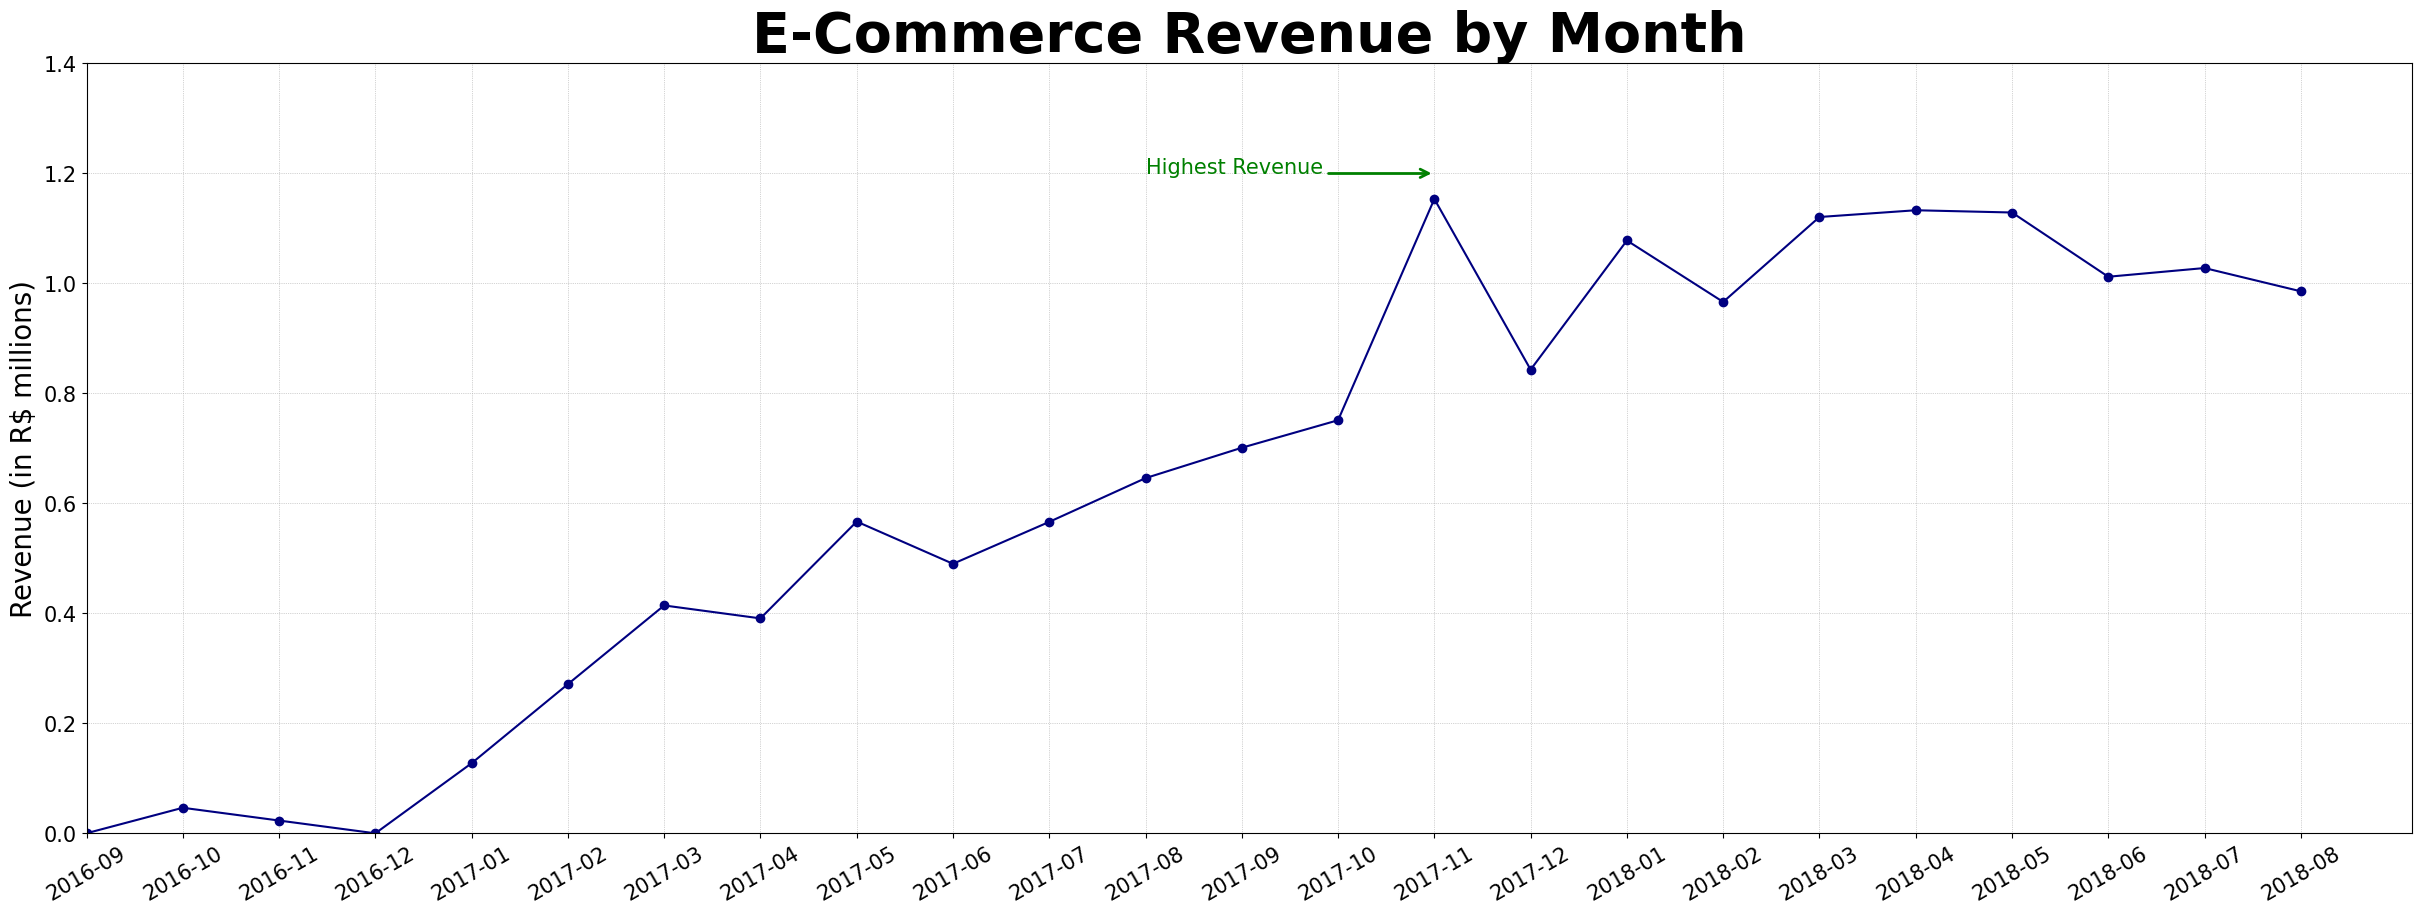

In [ ]:
fig = plt.figure(figsize=(30,10))
plt.title("E-Commerce Revenue by Month", fontsize=40, fontweight="bold")
plt.plot("order_date", "revenue", data=df_monthly, color="navy", marker="o", linewidth=1.5)
plt.grid(color="darkgray", linestyle=":", linewidth=0.5)
plt.xticks(fontsize=15, rotation=30)
labels, locs = plt.yticks()
plt.yticks(labels, (labels/1000000), fontsize=15)
plt.ylim(ymin=0)
plt.xlim(xmin=0)
plt.ylabel("Revenue (in R$ millions)", fontsize=20)
plt.annotate(text="Highest Revenue", xy=(14, 1200000),
             xytext=(11, 1200000), color="green", fontsize=15,
             arrowprops=dict(arrowstyle="->",
             connectionstyle="angle", color="green", linewidth=2))
plt.show()

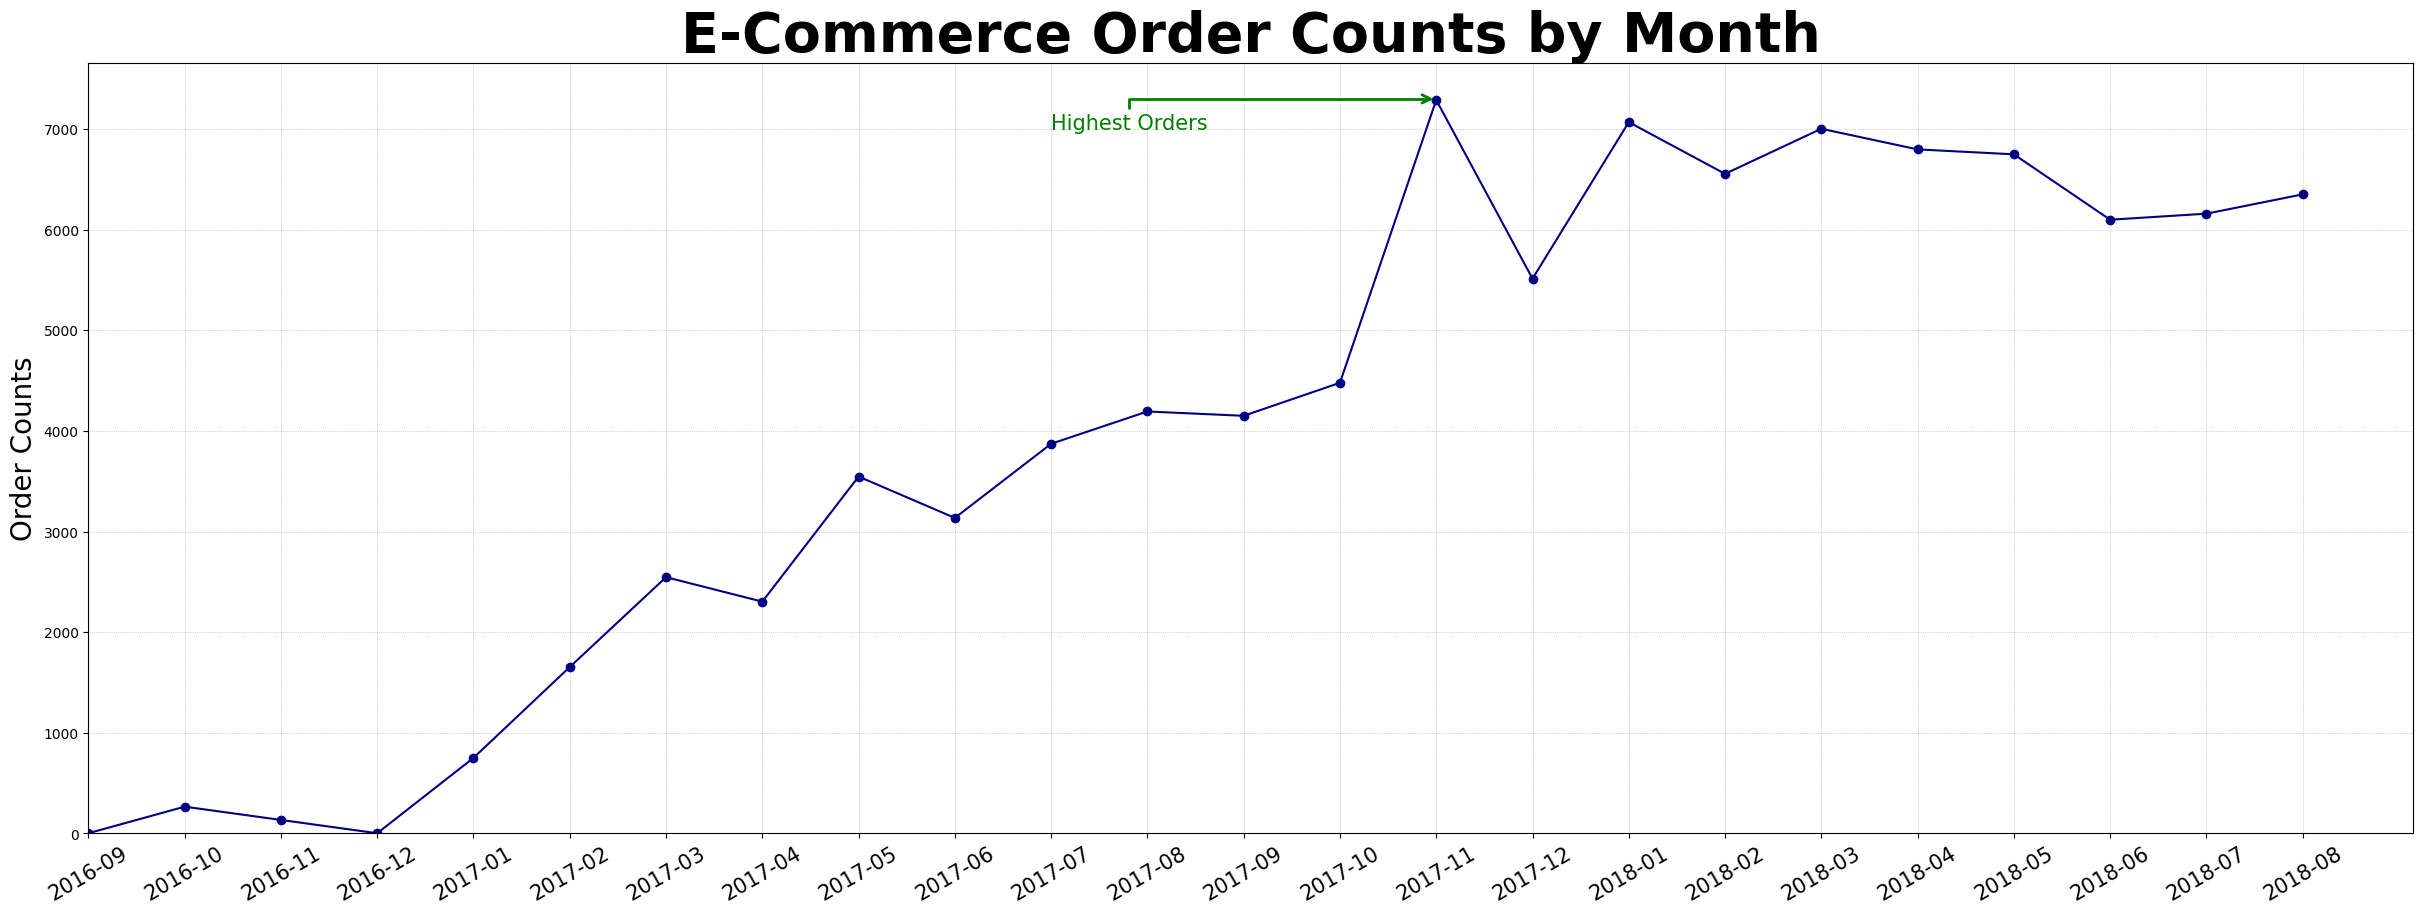

In [ ]:
fig = plt.figure(figsize=(30,10))
plt.title("E-Commerce Order Counts by Month", fontsize=40, fontweight="bold")
plt.plot("order_date", "order_count", data=df_monthly, color="navy", marker="o", linewidth=1.5)
plt.grid(color="darkgray", linestyle=":", linewidth=0.5)
plt.xticks(fontsize=15, rotation=30)
plt.ylim(ymin=0)
plt.xlim(xmin=0)
plt.ylabel("Order Counts", fontsize=20)
plt.annotate(text="Highest Orders", xy=(14, 7300),
             xytext=(10, 7000), color="green", fontsize=15,
             arrowprops=dict(arrowstyle="->",
             connectionstyle="angle", color="green", linewidth=2))
plt.show()

Berdasarkan kedua grafik di atas, dapat disimpulkan bahwa revenue dan jumlah order berada pada fase uptrend jika ditinjau sejak bulan September 2016. Hal ini membuktikan perkembangan yang positif pada e-commerce ini.

###2. Apa kategori produk dengan jumlah pemesanan dan penjualan produk terbanyak?

In [ ]:
#color palette
colors = ["#006600"] + ["#80ff80"]*4
colors2 = ["#990000"] + ["#ff8080"]*4

####a. Berdasarkan Order Count

In [ ]:
df_byproduct = df.groupby("product_category", as_index=False).agg({"order_id":"nunique","revenue":"sum"})
df_byproduct

,product_category,order_id,revenue
0,Agro Industry And Commerce,177,76203.30
1,Air Conditioning,246,59854.55
2,Art,195,27485.53
3,Arts And Craftmanship,23,2184.14
4,Audio,348,56255.32
...,...,...,...
69,Tablets Printing Image,79,8754.61
70,Telephony,4093,379202.62
71,Toys,3804,547061.06
72,Unknown,1392,197695.69


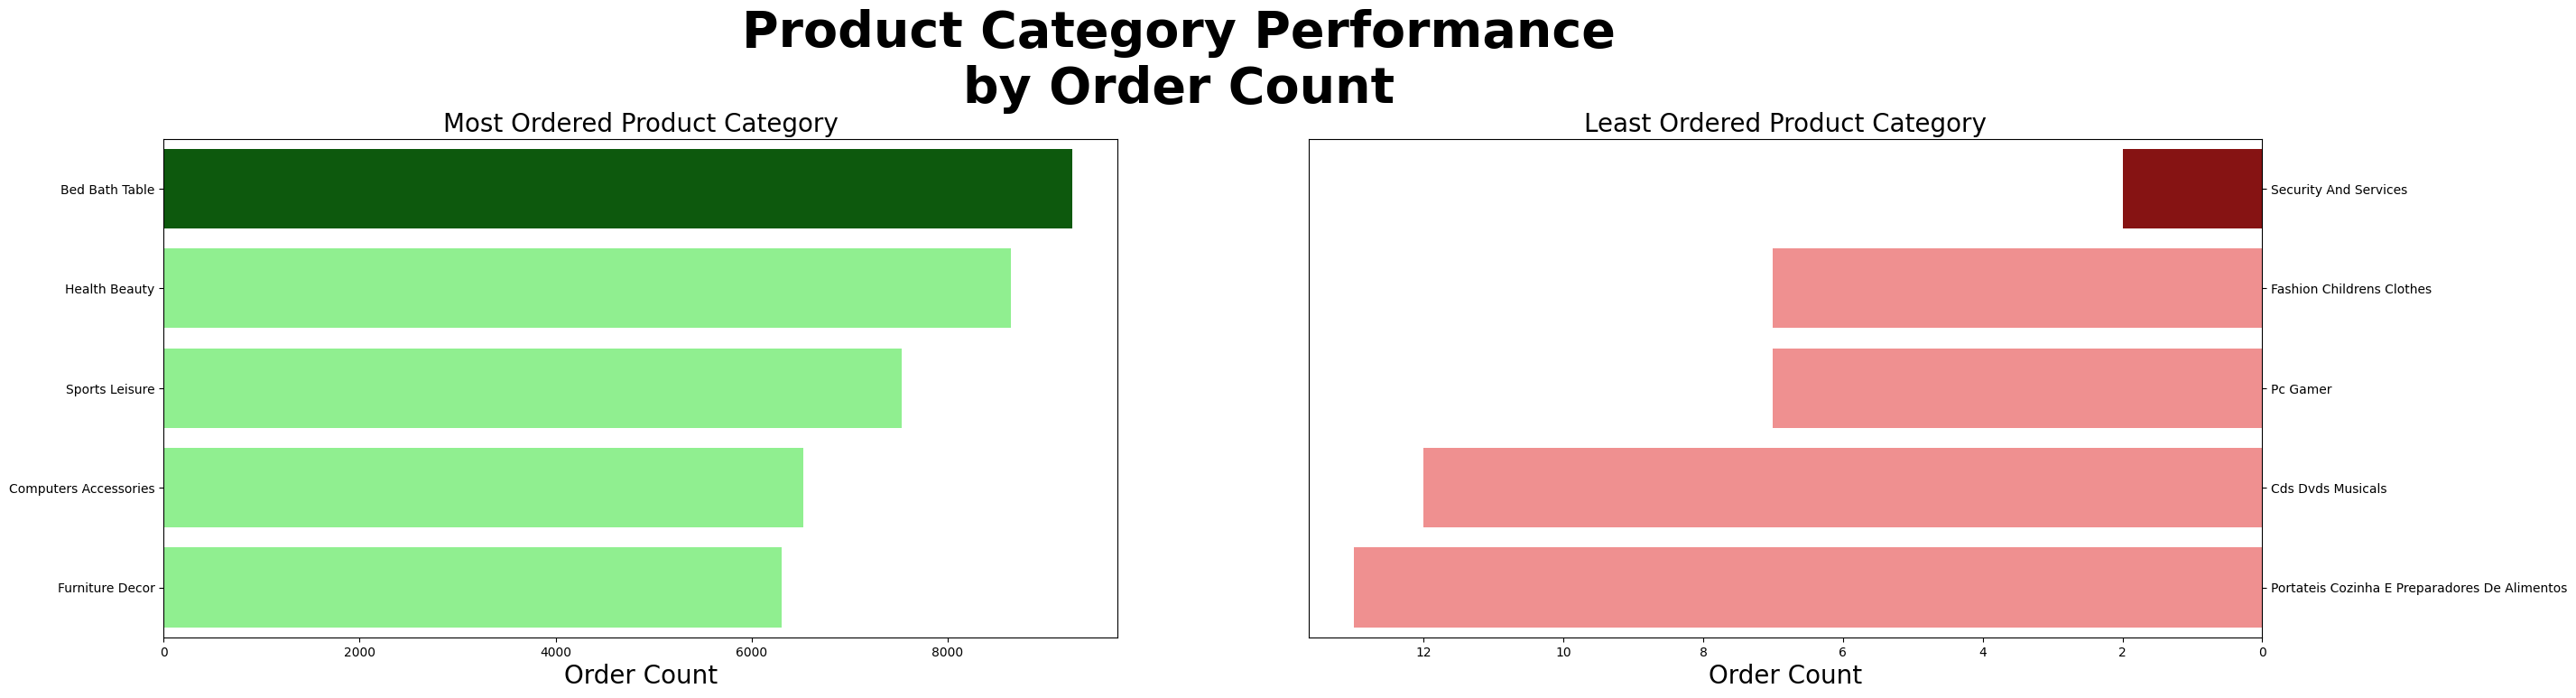

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(30,8))
plt.suptitle("Product Category Performance\nby Order Count", fontsize=40, fontweight="bold")
plt.subplots_adjust(top=0.8)
sns.barplot(y="product_category",
            x="order_id",
            data=df_byproduct.sort_values("order_id",ascending=False).head(),
            palette=colors,
            orient="h", ax=ax[0])
sns.barplot(y="product_category",
            x="order_id",
            data=df_byproduct.sort_values("order_id").head(),
            palette=colors2,
            orient="h", ax=ax[1])
ax[0].set_title("Most Ordered Product Category",fontsize=20)
ax[0].set_xlabel("Order Count",fontsize=20)

ax[1].set_title("Least Ordered Product Category",fontsize=20)
ax[1].set_xlabel("Order Count",fontsize=20)

ax[1].invert_xaxis()
ax[1].yaxis.tick_right()
[a.set_ylabel(None) for a in ax]
plt.show()

Terdapat kesalahan pada axes ke-2. Nama kategori produk peringkat ke-5 masih menggunakan bahasa asing.

Selanjutnya, mari tinjau nilai setiap nama kategori produk.

In [ ]:
df_product["product_category"].value_counts().to_dict()

{'Bed Bath Table': 3029,
 'Sports Leisure': 2867,
 'Furniture Decor': 2657,
 'Health Beauty': 2444,
 'Housewares': 2335,
 'Auto': 1900,
 'Computers Accessories': 1639,
 'Toys': 1411,
 'Watches Gifts': 1329,
 'Telephony': 1134,
 'Baby': 919,
 'Perfumery': 868,
 'Fashion Bags Accessories': 849,
 'Stationery': 849,
 'Cool Stuff': 789,
 'Garden Tools': 753,
 'Pet Shop': 719,
 'Unknown': 610,
 'Electronics': 517,
 'Construction Tools Construction': 400,
 'Home Appliances': 370,
 'Luggage Accessories': 349,
 'Consoles Games': 317,
 'Office Furniture': 309,
 'Musical Instruments': 289,
 'Small Appliances': 231,
 'Home Construction': 225,
 'Books General Interest': 216,
 'Fashion Shoes': 173,
 'Furniture Living Room': 156,
 'Air Conditioning': 124,
 'Books Technical': 123,
 'Fixed Telephony': 116,
 'Home Confort': 111,
 'Food Drink': 104,
 'Market Place': 104,
 'Fashion Male Clothing': 95,
 'Kitchen Dining Laundry Garden Furniture': 94,
 'Signaling And Security': 93,
 'Construction Tools Safet

Dari data diatas, dapat dilihat bahwa "Portateis Cozinha E Preparadores De Alimentos" adalah satu-satunya nama kategori produk yang masih menggunakan bahasa asing non-Inggris (Portugis).

In [ ]:
df["product_category"] = df["product_category"].replace({"Portateis Cozinha E Preparadores De Alimentos":"Portable Kitchen Food Preparers"})

Setelah itu, tampilkan barplot kembali.

In [ ]:
df_byproduct = df.groupby("product_category", as_index=False).agg({"order_id":"nunique","revenue":"sum"})

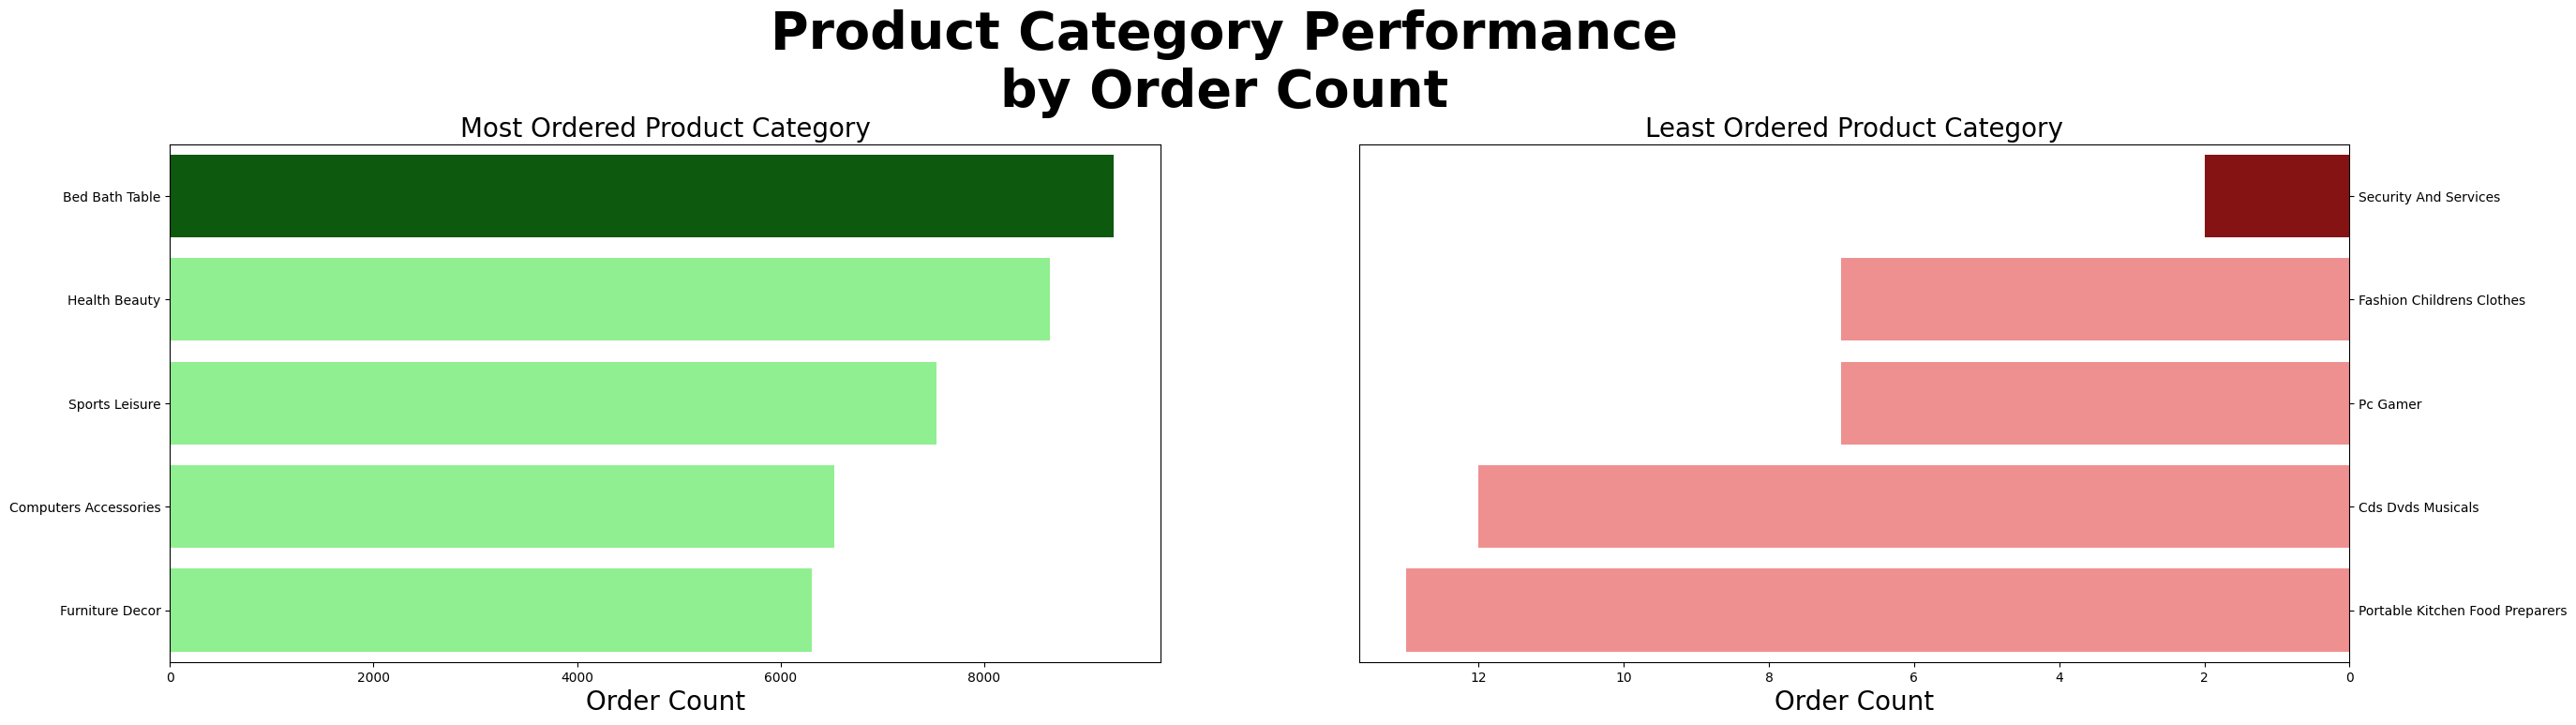

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(30,8))
plt.suptitle("Product Category Performance\nby Order Count", fontsize=40, fontweight="bold")
plt.subplots_adjust(top=0.8)
sns.barplot(y="product_category",
            x="order_id",
            data=df_byproduct.sort_values("order_id",ascending=False).head(),
            palette=colors,
            orient="h", ax=ax[0])
sns.barplot(y="product_category",
            x="order_id",
            data=df_byproduct.sort_values("order_id").head(),
            palette=colors2,
            orient="h", ax=ax[1])
ax[0].set_title("Most Ordered Product Category",fontsize=20)
ax[0].set_xlabel("Order Count",fontsize=20)

ax[1].set_title("Least Ordered Product Category",fontsize=20)
ax[1].set_xlabel("Order Count",fontsize=20)

ax[1].invert_xaxis()
ax[1].yaxis.tick_right()
[a.set_ylabel(None) for a in ax]
plt.show()

Dari barplot diatas, dapat disimpulkan bahwa kategori produk dengan jumlah order tertinggi dan terendah berturut-turut adalah "Bed Bath Table" dan "Security and Services".

####b. Berdasarkan Revenue

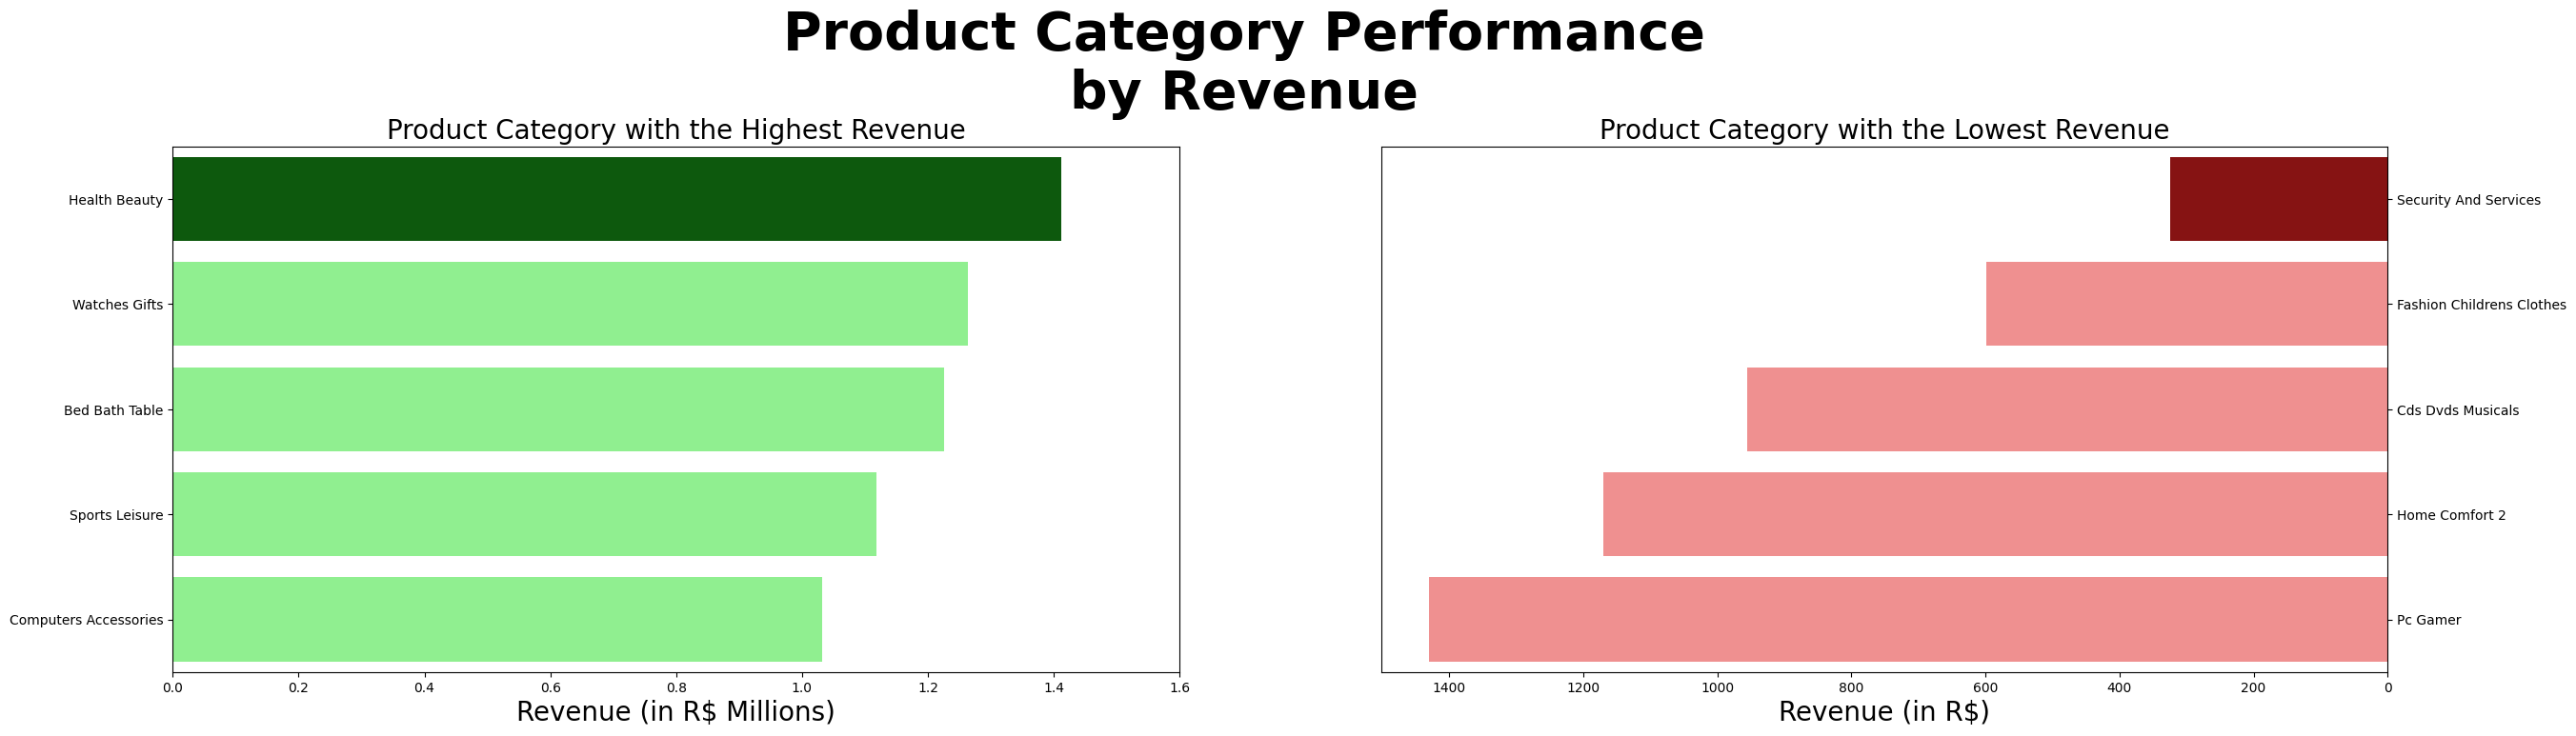

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(30,8))
plt.suptitle("Product Category Performance\nby Revenue", fontsize=40, fontweight="bold")
plt.subplots_adjust(top=0.8)
sns.barplot(y="product_category",
            x="revenue",
            data=df_byproduct.sort_values("revenue",ascending=False).head(),
            palette=colors,
            orient="h", ax=ax[0])
sns.barplot(y="product_category",
            x="revenue",
            data=df_byproduct.sort_values("revenue").head(),
            palette=colors2,
            orient="h", ax=ax[1])
ax[0].set_title("Product Category with the Highest Revenue",fontsize=20)
ax[0].set_xlabel("Revenue (in R$ Millions)",fontsize=20)
ax[0].set_xticks(ax[0].get_xticks())
ax[0].set_xticklabels([i/1000000 for i in ax[0].get_xticks()])
ax[1].set_title("Product Category with the Lowest Revenue",fontsize=20)
ax[1].set_xlabel("Revenue (in R$)",fontsize=20)

ax[1].invert_xaxis()
ax[1].yaxis.tick_right()
[a.set_ylabel(None) for a in ax]
plt.show()

Dari barplot diatas, dapat disimpulkan bahwa kategori produk dengan revenue tertinggi dan terendah berturut-turut adalah "Health Beauty" dan "Fashion Childrens Clothes".

###3. Kategori produk apa yang memiliki review paling bagus dan paling buruk?

In [ ]:
df_onreviews = pd.merge(left=df,
                        right=df_review,
                        how="inner",
                        left_on="order_id",
                        right_on="order_id")
df_onreviews.head()

,order_id,product_id,seller_id,product_category,price,freight_value,revenue,customer_id,order_status,order_date,customer_unique_id,customer_city,customer_state,seller_city,seller_state,review_score
0,e481f51cbdc54678b7cc49136f2d6af7,87285b34884572647811a353c7ac498a,3504c0cb71d7fa48d967e0e4c94d59d9,Housewares,29.99,8.72,38.71,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,7c396fd4830fd04220f754e42b4e5bff,sao paulo,SP,maua,SP,4
1,53cdb2fc8bc7dce0b6741e2150273451,595fac2a385ac33a80bd5114aec74eb8,289cdb325fb7e7f891c38608bf9e0962,Perfumery,118.70,22.76,141.46,b0830fb4747a6c6d20dea0b8c802d7ef,delivered,2018-07-24 20:41:37,af07308b275d755c9edb36a90c618231,barreiras,BA,belo horizonte,SP,4
2,47770eb9100c2d0c44946d9cf07ec65d,aa4383b373c6aca5d8797843e5594415,4869f7a5dfa277a7dca6462dcf3b52b2,Auto,159.90,19.22,179.12,41ce2a54c0b03bf3443c3d931a367089,delivered,2018-08-08 08:38:49,3a653a41f6f9fc3d2a113cf8398680e8,vianopolis,GO,guariba,SP,5
3,949d5b44dbf5de918fe9c16f97b45f8a,d0b61bfb1de832b15ba9d266ca96e5b0,66922902710d126a0e7d26b0e3805106,Pet Shop,45.00,27.20,72.20,f88197465ea7920adcdbec7375364d82,delivered,2017-11-18 19:28:06,7c142cf63193a1473d2e66489a9ae977,sao goncalo do amarante,RN,belo horizonte,MG,5
4,ad21c59c0840e6cb83a9ceb5573f8159,65266b2da20d04dbe00c5c2d3bb7859e,2c9e548be18521d1c43cde1c582c6de8,Stationery,19.90,8.72,28.62,8ab97904e6daea8866dbdbc4fb7aad2c,delivered,2018-02-13 21:18:39,72632f0f9dd73dfee390c9b22eb56dd6,santo andre,SP,mogi das cruzes,SP,5


In [ ]:
df_rev_group = df_onreviews.groupby("product_category",as_index=False).agg({"review_score":"mean"})
df_rev_group

,product_category,review_score
0,Agro Industry And Commerce,4.112360
1,Air Conditioning,4.119342
2,Art,4.098446
3,Arts And Craftmanship,4.125000
4,Audio,3.832370
...,...,...
69,Tablets Printing Image,4.155844
70,Telephony,4.031792
71,Toys,4.228483
72,Unknown,4.002152


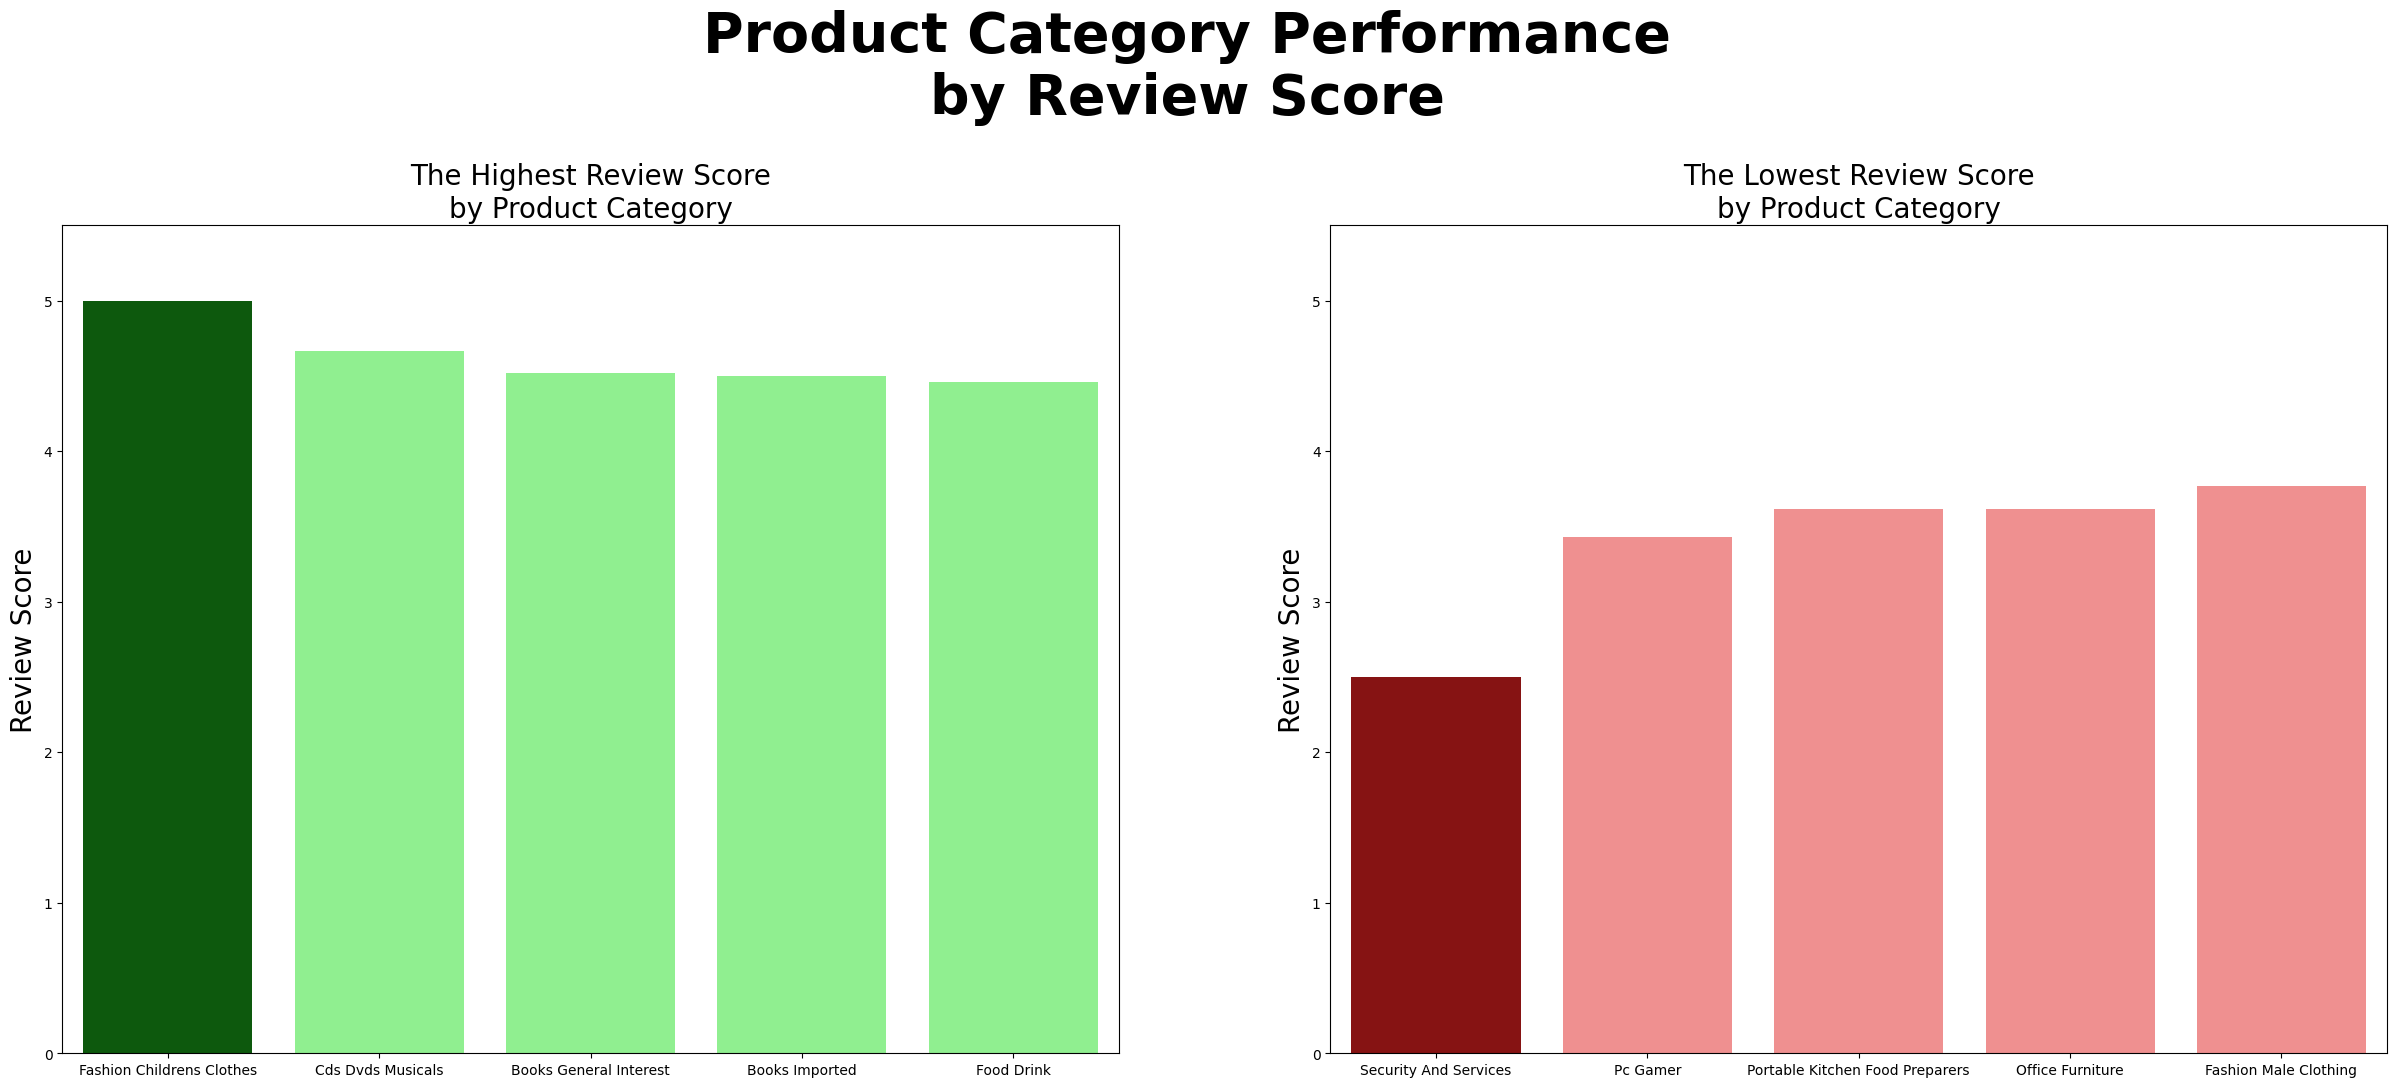

In [ ]:
fig, ax = plt.subplots(1,2, figsize=(30,12))
plt.suptitle("Product Category Performance\nby Review Score", fontsize=40, fontweight="bold")
plt.subplots_adjust(top=0.8)
sns.barplot(x="product_category",
            y="review_score",
            data=df_rev_group.sort_values("review_score",ascending=False).head(5),
            palette=colors,
            ax=ax[0])
sns.barplot(x="product_category",
            y="review_score",
            data=df_rev_group.sort_values("review_score").head(),
            palette=colors2,
            ax=ax[1])
ax[0].set_title("The Highest Review Score\nby Product Category",fontsize=20)
ax[0].set_ylabel("Review Score",fontsize=20)
ax[1].set_title("The Lowest Review Score\nby Product Category",fontsize=20)
ax[1].set_ylabel("Review Score",fontsize=20)

[a.set_xlabel(None) for a in ax]
[a.set_ylim(ymin=0, ymax=5.5) for a in ax]
plt.show()

Berdasarkan barplot di atas, dapat disimpulkan bahwa kategori produk dengan rating tertinggi dan terendah berturut-turut adalah "Fashion Childrens Clothes" dan "Security and Services".

###Analisis RFM (Untuk Pertanyaan 4,5, dan 6)

####a. Persiapan Data

In [ ]:
rfm = df.groupby("customer_unique_id", as_index=False).agg({"order_id":"nunique","order_date":"max","revenue":"sum"})

In [ ]:
rfm["recency"] = (rfm["order_date"].max() - rfm["order_date"]).dt.days

In [ ]:
rfm.sort_values("recency",ascending=True).head(10)

,customer_unique_id,order_id,order_date,revenue,recency
61041,a712a430955027da5bc257a10073a390,1,2018-08-28 21:56:30,161.97,0
57667,9dfcc502727549f99c9f73dbd28b35e9,1,2018-08-28 22:30:32,98.04,0
83805,e58697e3a253c253e1582f8c4f4c54ff,1,2018-08-28 19:31:41,185.82,0
73840,ca36d819c1759cdb6257fef0bb5d362d,1,2018-08-28 18:49:20,14.89,0
59751,a3bf67d0b92528d2fe5c379dd905bf66,1,2018-08-28 19:44:25,128.99,0
13158,23e6a9d387ba03e2099233222d7635cf,1,2018-08-28 15:11:49,188.13,0
31368,55cfdb1ec3c5bf60d9ccc0d5f276f8a9,1,2018-08-28 15:58:28,260.50,0
66821,b701bebbdf478f5500348f03aff62121,1,2018-08-29 14:52:00,33.23,0
64218,afbcfd0b9c5233e7ccc73428526fbb52,1,2018-08-29 08:46:11,497.25,0
91722,fb7e29c65321441231990afc201c1b14,2,2018-08-28 19:32:05,314.33,0


In [ ]:
rfm[rfm["recency"] == 0].shape

(29, 5)

Karena kepadatan order sangat padat sehingga di hari terkini pun banyak order yang diterima, maka recency akan dipecah ke timeframe yang lebih kecil, yaitu hours.

In [ ]:
rfm["recency"] = (rfm["order_date"].max() - rfm["order_date"])/np.timedelta64(1, 'h')

In [ ]:
rfm.sort_values("recency",ascending=True).head()

,customer_unique_id,order_id,order_date,revenue,recency
13433,24ac2b4327e25baf39f2119e4228976a,1,2018-08-29 15:00:37,93.75,0.000000
66821,b701bebbdf478f5500348f03aff62121,1,2018-08-29 14:52:00,33.23,0.143611
46739,7febafa06d9d8f232a900a2937f04338,1,2018-08-29 14:18:28,61.29,0.702500
33812,5c58de6fb80e93396e2f35642666b693,1,2018-08-29 14:18:23,510.96,0.703889
44590,7a22d14aa3c3599238509ddca4b93b01,1,2018-08-29 12:25:59,73.10,2.577222


In [ ]:
rfm = rfm.rename(columns={"order_id":"frequency", "revenue":"monetary"})
rfm.drop("order_date", axis=1, inplace=True)

In [ ]:
rfm.head()

,customer_unique_id,frequency,monetary,recency
0,0000366f3b9a7992bf8c76cfdf3221e2,1,141.90,2668.069444
1,0000b849f77a49e4a4ce2b2a4ca5be3f,1,27.19,2739.819444
2,0000f46a3911fa3c0805444483337064,1,86.22,12881.926111
3,0000f6ccb0745a6a4b88665a16c9f078,1,43.62,7698.515556
4,0004aac84e0df4da2b147fca70cf8255,1,196.89,6907.248611


#####Menambah fitur baru untuk mengiterasi customer unique id yang panjang.

In [ ]:
rfm = rfm.sort_values("customer_unique_id")
rfm["customer_id_number"] = [i for i in range(len(rfm["customer_unique_id"].to_list()))]

In [ ]:
rfm.tail()

,customer_unique_id,frequency,monetary,recency,customer_id_number
93353,fffcf5a5ff07b0908bd4e2dbc735a684,1,2067.42,10722.000278,93353
93354,fffea47cd6d3cc0a88bd621562a9d061,1,84.58,6282.878056,93354
93355,ffff371b4d645b6ecea244b27531430a,1,112.46,13631.189167,93355
93356,ffff5962728ec6157033ef9805bacc48,1,133.69,2855.715556,93356
93357,ffffd2657e2aad2907e67c3e9daecbeb,1,71.56,11610.697778,93357


#####Membuat dataframe RFM yang tersortir

In [ ]:
sorted_recency = rfm.sort_values("recency",ascending=True)
sorted_recency.reset_index(drop=True, inplace=True)
sorted_recency

,customer_unique_id,frequency,monetary,recency,customer_id_number
0,24ac2b4327e25baf39f2119e4228976a,1,93.75,0.000000,13433
1,b701bebbdf478f5500348f03aff62121,1,33.23,0.143611,66821
2,7febafa06d9d8f232a900a2937f04338,1,61.29,0.702500,46739
3,5c58de6fb80e93396e2f35642666b693,1,510.96,0.703889,33812
4,7a22d14aa3c3599238509ddca4b93b01,1,73.10,2.577222,44590
...,...,...,...,...,...
93353,87776adb449c551e74c13fc34f036105,1,40.95,16672.485000,49410
93354,8d3a54507421dbd2ce0a1d58046826e0,1,133.46,16672.909444,51400
93355,61db744d2f835035a5625b59350c6b63,1,53.73,16673.783611,35810
93356,2f64e403852e6893ae37485d5fcacdaf,1,39.09,16678.063056,17361


In [ ]:
sorted_frequency = rfm.sort_values("frequency",ascending=False)
sorted_frequency.reset_index(drop=True, inplace=True)
sorted_frequency

,customer_unique_id,frequency,monetary,recency,customer_id_number
0,8d50f5eadf50201ccdcedfb9e2ac8455,15,879.27,211.769722,51431
1,3e43e6105506432c953e165fb2acf44c,9,1172.67,4388.399444,22779
2,6469f99c1f9dfae7733b25662e7f1782,7,758.83,1502.284167,36706
3,ca77025e7201e3b30c44b472ff346268,7,1122.72,2139.368889,73921
4,1b6c7548a2a1f9037c1fd3ddfed95f33,7,959.01,4705.640278,10060
...,...,...,...,...,...
93353,565811ed44e539a14bc391cf57373ed1,1,30.84,6591.717222,31564
93354,5657f9f721c16800a66c21081d46b18d,1,65.71,6789.924444,31563
93355,5657dfebff5868c4dc7e8355fea865c4,1,105.38,6986.226667,31562
93356,5657596addb4d7b07b32cd330614bdf8,1,189.26,7186.675556,31561


In [ ]:
sorted_monetary = rfm.sort_values("monetary",ascending=False)
sorted_monetary.reset_index(drop=True, inplace=True)
sorted_monetary

,customer_unique_id,frequency,monetary,recency,customer_id_number
0,0a0a92112bd4c708ca5fde585afaa872,1,13664.08,8015.595833,3724
1,da122df9eeddfedc1dc1f5349a1a690c,2,7571.63,12359.032222,79636
2,763c8b1c9c68a0229c42c9fc6f662b93,1,7274.88,1080.181389,43168
3,dc4802a71eae9be1dd28f5d788ceb526,1,6929.31,13506.383611,80463
4,459bef486812aa25204be022145caa62,1,6922.21,836.838889,25436
...,...,...,...,...,...
93353,2878e5b88167faab17d4fb83a986d38b,1,11.63,7290.529444,14799
93354,6f5b9d1cdccc4d28f0483a612edecacf,1,11.63,8662.917500,40696
93355,b33336f46234b24a613ad9064d13106d,1,10.89,1650.520000,65459
93356,bd06ce0e06ad77a7f681f1a4960a3cc6,1,10.07,8395.788056,69027


####b. Visualisasi RFM

In [ ]:
rfm_dict = {"recency":sorted_recency, "frequency":sorted_frequency, "monetary":sorted_monetary}

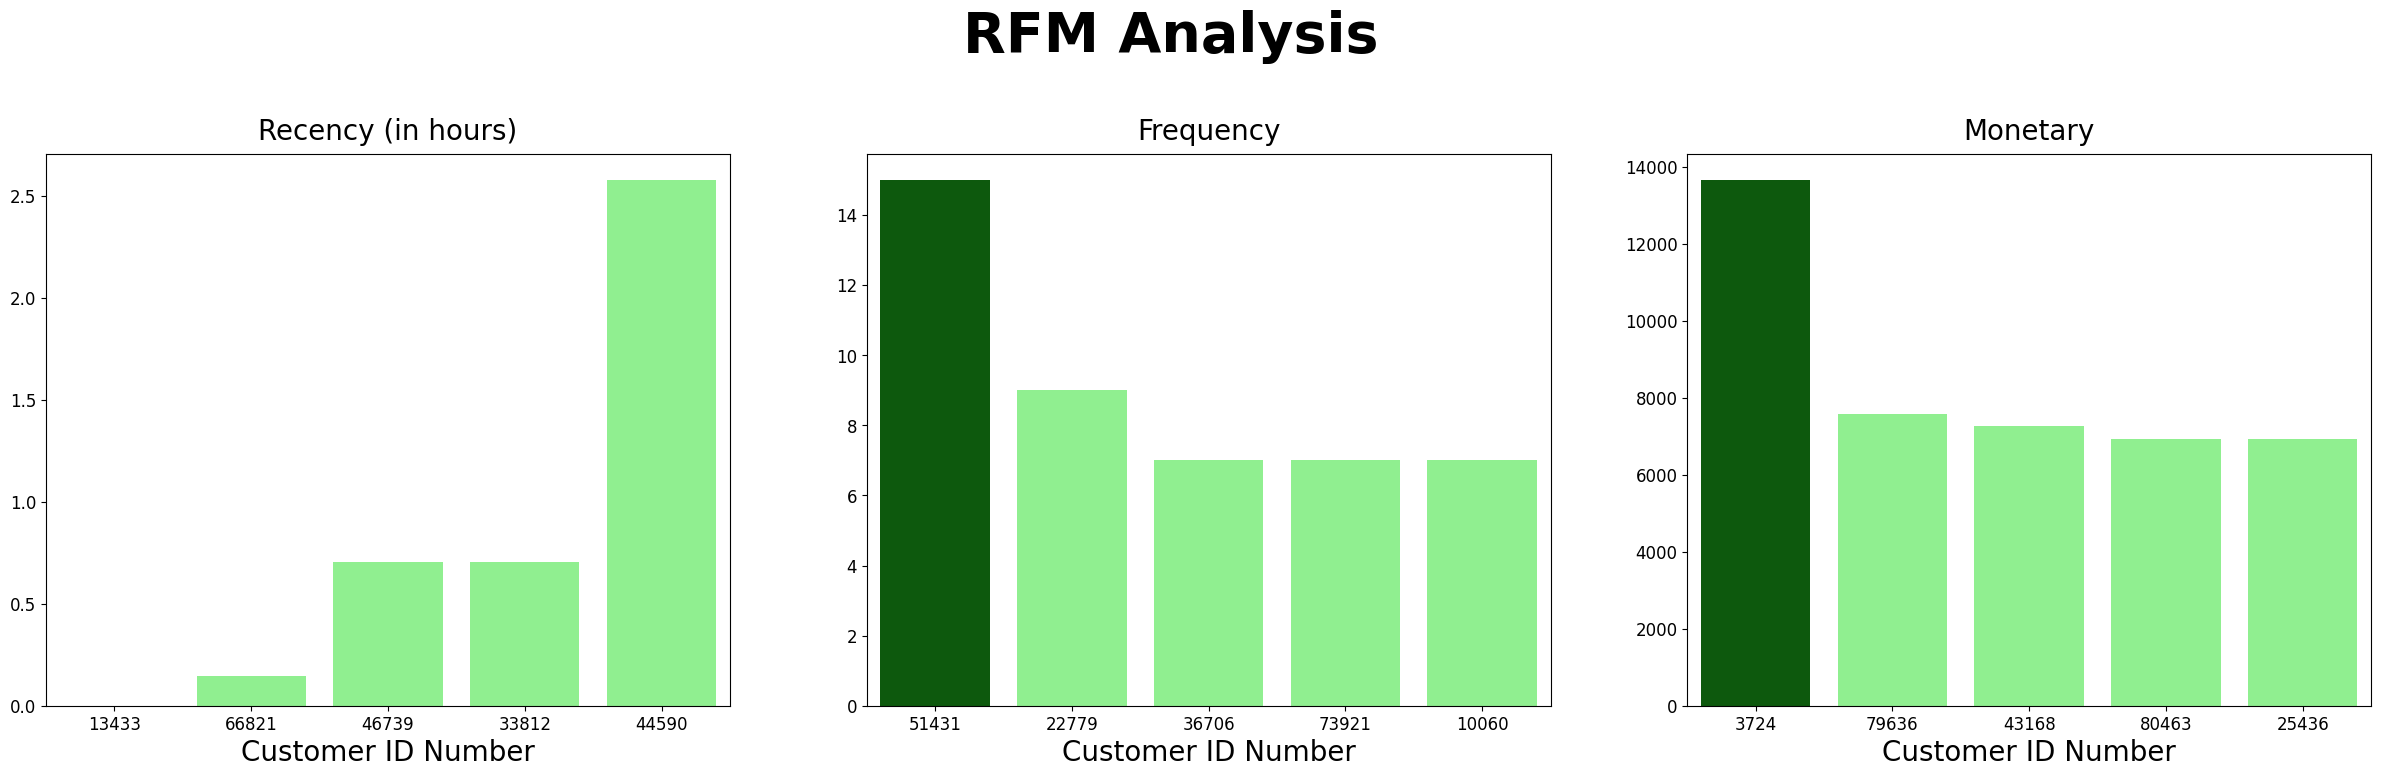

In [ ]:
fig, ax = plt.subplots(1,3, figsize=(30,8))
plt.suptitle("RFM Analysis", fontsize=40, fontweight="bold")
plt.subplots_adjust(top=0.8)
i = 0
for metric, table in rfm_dict.items():
  sns.barplot(x=table.head().index,
              y=metric,
              data=table.head(),
              palette=colors,
              ax=ax[i])
  if metric == "recency":
    ax[i].set_title(metric.title()+" (in hours)", fontsize=20, pad=10)
  else :
    ax[i].set_title(metric.title(),fontsize=20, pad=10)
  ax[i].set_xticklabels(table.head()["customer_id_number"])
  ax[i].set_xlabel("Customer ID Number",fontsize=20)
  ax[i].tick_params(labelsize=12)
  ax[i].set_ylabel(None)
  i += 1
plt.show()

Berdasarkan barplot diatas, dapat disimpulkan :

a. Jumlah pelanggan yang memesan sejak 1 jam sebelum waktu terkini adalah 4 orang.

b. Frekuensi order terbesar dari pelanggan yang sama adalah sebanyak 15 order.

c. Uang terbanyak yang dikeluarkan dari pelanggan yang sama adalah kurang lebih sebesar R$ 14.000.

####Eksplorasi RFM lebih lanjut

#####Mengambil customer unique id

In [ ]:
customer_recency = sorted_recency.head()["customer_unique_id"].to_list()
customer_frequency = sorted_frequency.head()["customer_unique_id"].to_list()
customer_monetary = sorted_monetary.head()["customer_unique_id"].to_list()

#####Data Recency

In [ ]:
top_r = df[df["customer_unique_id"].isin(customer_recency)]

In [ ]:
top_r.groupby("product_category").agg({"order_id":"nunique","revenue":"sum","order_date":"max"}).sort_values("order_date", ascending=False)

,order_id,revenue,order_date
product_category,,,
Computers Accessories,1,93.75,2018-08-29 15:00:37
Party Supplies,1,33.23,2018-08-29 14:52:00
Health Beauty,1,61.29,2018-08-29 14:18:28
Kitchen Dining Laundry Garden Furniture,1,510.96,2018-08-29 14:18:23
Toys,1,73.10,2018-08-29 12:25:59


Berdasarkan 5 data recency teratas, dapat dilihat bahwa kategori produk terakhir yang dibeli adalah Computer Accessories.

#####Data Frequency

In [ ]:
top_f = df[df["customer_unique_id"].isin(customer_frequency)]

In [ ]:
top_f.groupby("product_category").agg({"order_id":"nunique","revenue":"sum","order_date":"max"}).sort_values("order_id", ascending=False)

,order_id,revenue,order_date
product_category,,,
Bed Bath Table,12,1336.93,2018-06-28 00:43:34
Sports Leisure,10,684.77,2018-08-18 12:39:19
Furniture Decor,8,912.80,2018-04-26 11:44:48
Housewares,4,466.38,2018-06-01 11:38:29
Fashion Bags Accessories,3,73.95,2018-07-04 22:35:13
Cool Stuff,2,481.19,2018-05-03 06:11:22
Computers Accessories,1,76.17,2018-02-20 10:45:22
Costruction Tools Tools,1,38.66,2018-08-20 19:14:26
Health Beauty,1,166.19,2018-02-14 13:22:12


Dari 5 data frequency teratas, dapat dilihat bahwa kategori produk yang paling banyak dibeli adalah Bed, Bath and Table, serta Sports Leisure dengan selisih yang tidak jauh.

#####Data Monetary

In [ ]:
top_m = df[df["customer_unique_id"].isin(customer_monetary)]
top_m.groupby("product_category").agg({"order_id":"nunique","revenue":"sum","order_date":"max"}).sort_values("revenue", ascending=False)

,order_id,revenue,order_date
product_category,,,
Fixed Telephony,2,20938.96,2018-07-15 14:49:44
Small Appliances,2,7571.63,2017-04-01 15:58:41
Housewares,1,6929.31,2017-02-12 20:37:36
Computers,1,6922.21,2018-07-25 18:10:17


Dari 5 data monetary teratas, dapat dilihat bahwa kategori produk Fixed Telephony menghasilkan revenue terbesar.

##Conclusion

###Conclusion 1 :
Performa e-commerce jika dilihat dari revenue dan jumlah order dalam tren yang positif sejak 2016. Namun, penurunan revenue terkini dibandingkan bulan sebelumnya perlu diperhatikan dan dievaluasi. Sementara itu, jumlah order dalam 3 bulan terakhir mengalami kenaikan tipis.

###Conclusion 2 :
Berdasarkan data, Bed,Bath, and Tables menjadi kategori produk dengan jumlah order terbanyak. Sedangkan, Security and Services memiliki jumlah order paling sedikit.

Health and beauty menjadi kategori produk yang menghasilkan revenue terbesar. Sedangkan, Fashion Children's Clothes menjadi kategori produk dengan revenue terkecil.

###Conclusion 3 :
Fashion, Children's Clothes menjadi kategori produk dengan review score paling tinggi, sedangkan Security and Services menjadi kategori produk dengan review score paling rendah.

Security dan Services perlu menjadi perhatian disini, karena memiliki jumlah order paling kecil sekaligus memiliki review score paling rendah. Mungkin, performa seller perlu dievaluasi, bahkan jika perlu diberikan peringatan/penalti.

Di sisi lain, Fashion, Children's Clothes memiliki review score tertinggi, namun justru menghasilkan revenue terkecil. Oleh karena itu, mungkin perlu dilakukan evaluasi terkait strategi pemasaran di sektor ini. Review score membuktikan bahwa produk yang dijual di e-commerce ini memiliki kualitas yang bagus, maka kategori produk ini dapat menjadi potensi untuk menghasilkan revenue yang lebih tinggi.

###Conclusion 4, 5, dan 6:
A. Recency :
Aktivitas jual-beli di e-commerce ini cukup padat. Diketahui terdapat 29 order pada hari terkini. Dalam timestamp hours, terdapat 4 order dalam 1 jam terakhir.

Kategori produk yang dibeli juga bervariasi.

B. Frequency :
Jumlah repeat order di e-commerce ini sejak 2016 relatif sedikit. Frequency order untuk setiap pelanggan yang terbanyak adalah 15 order. Dapat disimpulkan bahwa perlu dilakukan kampanye pemasaran kepada pelanggan dengan frequency order sedikit, sedangkan untuk pelanggan dengan frequency tinggi dapat diberikan promo menarik seperti gratis ongkir atau potongan harga untuk meningkatkan loyalitas pelanggan.

Berdasarkan data frekuensi pembelian pelanggan yang teratas, Bed, Bath, and Table menjadi kategori produk yang paling banyak dibeli oleh para pelanggan tersebut.

C. Monetary :
Jumlah uang terbesar yang dikeluarkan pelanggan adalah sekitar R$ 14.000.

Dari 5 data pelanggan dengan monetary teratas, kategori fixed telephony menghasilkan revenue teratas dari pelanggan tersebut.

###Import CSV

In [ ]:
df.to_csv("complete_ecommerce_data.csv", index=False)

In [ ]:
df_onreviews.to_csv("ecommerce_review.csv", index=False)